<a href="https://colab.research.google.com/github/MariaPetrovskaya/Data-Science-for-HR/blob/main/Research%20of%20job%20postings%2C%20category%20Project%20Manager%20DA%2C%20ML%2C%20NLP/Ver_1_Research_of_job_postings%2C_category_Project_Manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Описание проекта


*   Исследование проводилось для кадрового агентства, предоставившего данные по закрытию вакансий за период 2023 - начало 2024 года.
*   Предмет исследования: группа публикаций вакансий Project Manager/Менеджер проектов.  










###Цель проекта



*   Провести анализ опубликованных вакансий за 2023 год с целью подтверждения или опровержения гипотез относительно влияния определенных условий на вакансии
(перечень гипотез в приложении к ТЗ).
*   В случае обнаружения дополнительных условий, влияющих на отклик кандидатов, которые не были ранее учтены в исходных гипотезах, включить в проект их изложение.
*   В случае обнаружения дополнительных условий, влияющих на отклик кандидатов, которые не были ранее учтены в исходных гипотезах, включить в проект их изложение.







#### Описание данных (ТЗ)


*   **`id`** - Уникальный идентификатор вакансии
---
*   **`Статус`** - Статус вакансии. Категориальное значение. Возможные значения:
  *   **Архив** - вакансия закрыта, не удалось найти подходящую кандидатуру силами агентства
  *   **Закрыта нами** - вакансия закрыта, подходящая кандидатура найдена силами *   агентства;
  *   **Активна** - вакансия опубликована, идет активный поиск кандидатов;
  *   **На рассмотрении** - пул кандидатов набран, заказчик осуществляет отбор, набор новых кандидатов не ведется;
  *   **Отклонена** - заказчик отказался от рассмотрения пула кандидатов, набор кандидатов не ведется;
  *   **Черновик** - вакансия в стадии заполнения.
---
*   **`Источник лида`** - Источник вакансии. Категориальное значение. Возможные значения:
  *   **Входящая заявка** - заказчик сам заполнил форму на сайте КА;
  *   **Сорсинг** - менеджеры КА привлекли заказчика исходящим поиском;
  *   **Повторная** - это не первая вакансия компании, подбор на которую будет делать КА;
  *   **Реферальная** - заказчик пришел в КА по рекомендации от другого заказчика.
---
*   **`Менеджер`** - Менеджер, ответственный за вакансию. Возможны пустые значения в связи с тем, что это поле сначала не существовало, потом было не обязательным к заполнению.
---
*   **`Дата публикации`** - Дата, когда вакансия была опубликована на сайте КА.
---
*   **`Дата закрытия`** - Дата, когда заказчик одобрил кандидата КА или отказался от услуг КА по данной вакансии.
---
*   **`Количество просмотров`** - Количество уникальных пользователей сайта, кликнувших на заголовок вакансии, чтобы увидеть всю вакансию.
---
*  **`Количество откликов`** - Количество уникальных пользователей сайта, отправивших отклик на вакансию.
---
*   **`Позиция`** - Название вакансии
---
*   **`Зарплата от`** - Нижняя граница заработной платы для вакансии. Поля может быть пустым
---
*   **`Зарплата до`** - Верхняя граница заработной платы для вакансии. Поле может быть пустым.
---
*   **`Город`** - В каких городах предлагается работа вне зависимости от формата. Например, может быть указан город Москва - при этом занятость необязательно офисная, поэтому кандидат может находиться в другой локации.
---
*   **`Формат оформления`** - Какой формат оформления предлагает заказчик.
---
*   **`Формат работы`** - Какой формат работы предлагает заказчик.
---
*   **`Опыт`** - Какой опыт работы должен быть у соискателя.
---
*   **`Образования`** - Какое образование должно быть у соискателя.
---
*   **`Ссылка на тестовое`** - Есть ли ссылка на тестовое задание в описании вакансии.
---
*   **`Занятость`** - Какой формат занятости предлагает заказчик.
---
*   **`Обязательные требования`** - Какие обязательные требования предъявляет заказчик к кандидатам.
---
*   **`Дополнительный требования`** - Какие дополнительные требования предъявляет заказчик к кандидатам.
---
*   **`Этапы отбора`** - Этапы отбора на должность
---
*   **`Условия`** - Краткое текстовое описание условий вакансии. Может повторять информацию из других столбцов



##Импорты и инсталляции

In [1]:
pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=7c1a1beacd4997cf59981ab4b5d7c11a86a233b6e5cee5635f1f71c324c69467
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
!pip install phik==0.10.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.4/599.4 kB 7.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import re

In [4]:
import numpy as np

In [5]:
from tqdm import notebook

In [6]:
import plotly.express as px

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import date
import phik

In [8]:

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:

  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.corpus import names, stopwords, words

In [11]:
from wordcloud import WordCloud, STOPWORDS

In [12]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:

from nltk.stem import WordNetLemmatizer


In [14]:
import torch

In [15]:
import pymorphy2


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from pymystem3 import Mystem
from joblib import Parallel, delayed

In [17]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


##Загрузка данных

####Загрузка датасета

In [18]:
df = pd.read_excel('/content/drive/MyDrive/Yandex for HR agency/data/vacancy_statistics_2023.xlsx', index_col=False)

#### Просмотр датасета

In [19]:
df.sample(5) #5 rows

id           Статус    Источник лида   Менеджер Дата публикации  \
1221  1968      Акселерация        Повторная  Фаткуллин      2023-11-23   
1033  1712     Закрыта нами  Входящая заявка   Корягина      2023-09-27   
571   1049  На рассмотрении      Реферальная        NaN      2023-06-20   
455    870            Архив        Повторная        NaN      2023-05-19   
559   1027            Архив          Сорсинг    Иванова      2023-06-14   

     Дата закрытия  Количество просмотров  Количество откликов  \
1221           NaN                      9                    5   
1033    2023-10-05                     18                    4   
571            NaN                     20                   11   
455     2023-08-25                     47                   15   
559     2023-07-05                     64                   25   

                   Компания                       Позиция  ...  \
1221        Tanto Solutions  Системный аналитик в команду  ...   
1033    Цифровая корпорация             Менеджер проектов  ...   
571               IT Agency      Трафик-менеджер (Junior)  ...   
455            Яндекс Поиск   Специалист по оценке Поиска  ...   
559   ООО ТРИНИТИ ПРОДЖЕКТС              Младший аналитик  ...   

                                      Формат оформления  \
1221  ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...   
1033                    Самозанятость, Трудовой договор   
571   ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...   
455   ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...   
559                                    Трудовой договор   

               Формат работы  \
1221  Офис, Гибрид, Удаленка   
1033                Удаленка   
571                 Удаленка   
455                 Удаленка   
559             Офис, Гибрид   

                                                   Опыт  \
1221  Около-релевантный (Pet-проекты, open-source, в...   
1033  Около-релевантный (Pet-проекты, open-source, в...   
571   Около-релевантный (Pet-проекты, open-source, в...   
455   Около-релевантный (Pet-проекты, open-source, в...   
559   Около-релевантный (Pet-проекты, open-source, в...   

                                            Образование  \
1221  Другое, Около-релевантное (например, техническ...   
1033  Другое, Около-релевантное (например, техническ...   
571   Другое, Около-релевантное (например, техническ...   
455   Другое, Около-релевантное (например, техническ...   
559   Другое, Около-релевантное (например, техническ...   

                            Ссылка на тестовое  \
1221                                       NaN   
1033                                       NaN   
571   https://disk.yandex.com/i/huv70gekC49nSg   
455                                        NaN   
559                                        NaN   

                                              Занятость  \
1221                                             Полная   
1033                                             Полная   
571                                              Полная   
455   Волонтерство, Проектная, Частичная, Стажировка...   
559                                              Полная   

                                Обязательные требования  \
1221  1. Высшее образование _x000D_\n_x000D_\n2. Баз...   
1033  —  Понимание методологий управления проектами,...   
571   - Грамотность и внимательность. Ежедневно вы б...   
455   - быстро разбираетесь в сложных и незнакомых т...   
559   Уверенное владение Excel (формулы, сводные таб...   

                              Дополнительный требования  \
1221                                                NaN   
1033  — Опыт работы в качестве ПМа будет преимуществом.   
571                                                 NaN   
455   - готовы к полному рабочему дню;_x000D_\n- пол...   
559   - Опыт работы на медийном рынке, знание медийн...   

                                           Этапы отбора  \
1221  1. Отбор резюме._x000D_\n2. Онлайн собеседован...   
1033  1. Просмотр рез

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1302 non-null   int64  
 1   Статус                     1302 non-null   object 
 2   Источник лида              1292 non-null   object 
 3   Менеджер                   1209 non-null   object 
 4   Дата публикации            1302 non-null   object 
 5   Дата закрытия              1144 non-null   object 
 6   Количество просмотров      1302 non-null   int64  
 7   Количество откликов        1302 non-null   int64  
 8   Компания                   1302 non-null   object 
 9   Позиция                    1302 non-null   object 
 10  Курсы ЯП                   1302 non-null   object 
 11  Зарплата от                476 non-null    float64
 12  Зарплата до                377 non-null    float64
 13  Город                      1302 non-null   objec

In [21]:
# создадим пустые списки
columns = [] # наименования атрибутов
type_list = [] # типы данных
null_ratio = [] # доля пропусков
unique_cnt = [] # количество уникальных значений
unique_names = [] # уникальные значения

# циклом добавим значения в пустые списки
for i in df.columns:
    columns.append(i)
    type_list.append(df[i].dtypes)
    null_ratio.append(f'{(100 * df[i].isnull().sum()/len(df[i])):.2f}' + '%')
    unique_cnt.append(df[i].nunique())
    unique_names.append(df[i].unique())

# сохраним в датафрейм
unique_df = pd.DataFrame({'column_name' : columns,
                          'column_type' : type_list,
                          'null_ratio' : null_ratio,
                          'unique_cnt' : unique_cnt,
                          'unique_names' : unique_names})


unique_df

column_name column_type null_ratio  unique_cnt  \
0                          id       int64      0.00%        1302   
1                      Статус      object      0.00%           6   
2               Источник лида      object      0.77%           4   
3                    Менеджер      object      7.14%           9   
4             Дата публикации      object      0.00%         250   
5               Дата закрытия      object     12.14%         230   
6       Количество просмотров       int64      0.00%         159   
7         Количество откликов       int64      0.00%          65   
8                    Компания      object      0.00%         828   
9                     Позиция      object      0.00%         700   
10                   Курсы ЯП      object      0.00%         128   
11                Зарплата от     float64     63.44%          46   
12                Зарплата до     float64     71.04%          49   
13                      Город      object      0.00%          98   
14          Формат оформления      object      0.00%          27   
15              Формат работы      object      0.00%           7   
16                       Опыт      object      0.00%           4   
17                Образование      object      0.00%           3   
18         Ссылка на тестовое      object     91.78%         102   
19                  Занятость      object      0.00%          21   
20    Обязательные требования      object      0.00%        1234   
21  Дополнительный требования      object     48.23%         632   
22               Этапы отбора      object      0.00%         856   
23                    Условия      object      0.00%        1184   

                                         unique_names  
0   [40, 104, 157, 181, 184, 281, 282, 283, 284, 2...  
1   [Архив, Закрыта нами, Отклонена, Преакселераци...  
2   [Повторная, Входящая заявка, Реферальная, nan,...  
3   [Фаткуллин, Оборина, nan, Кариаули, Иванова, И...  
4   [2023-08-30, 2023-08-22, 2023-08-28, 2023-08-2...  
5   [2023-08-30, 2023-08-22, 2023-10-03, 2023-08-2...  
6   [153, 188, 37, 33, 51, 29, 34, 46, 99, 5, 14, ...  
7   [35, 4, 8, 7, 13, 6, 10, 3, 2, 1, 15, 16, 9, 2...  
8   [Школа IT, SymbioWay, KeyHabits, GlowByte, Glo...  
9   [Стажёр Python разработчик (неоплачиваемая ста...  
10  [Python-Разработчик, Мидл Фронтенд-разработчик...  
11  [nan, 70000.0, 50000.0, 30000.0, 35000.0, 0.0,...  
12  [nan, 100000.0, 19000.0, 130000.0, 40000.0, 50...  
13  [Москва, Ростов-на-Дону, Санкт-Петербург, Челя...  
14  [ИП, ГПХ, Самозанятость, Контракт, Трудовой до...  
15  [Удаленка, Офис, Офис, Гибрид, Гибрид, Удаленк...  
16  [Около-релевантный (Pet-проекты, open-source, ...  
17  [Другое, Около-релевантное (например, техничес...  
18  [nan, https://docs.google.com/document/d/1_7EK...  
19  [Проектная, Частичная, Частичная, Полная, Прое...  
20  [Наш стек: Python, fastapi, postgres, gitlab\n...  
21  [Основные требования к ребятам, которые хотели...  
22  [Техническое задание и интервью, 1) тестовое з...  
23  [Школа бесплатна и сотрудничает с фондами.\n\n...

##Изменить Наблюдаемые возможности на основе данных и план работы

С точки зрения бизнес-логики, в датасете содержатся следующие группы данных:


*   Признаки вакансии, очевидные для кандидата (параметры публикации вакансии)
*   Данные о бизнес процессе, не очевидные для кандидата



**Параметры вакансии, которые видит кандидат** (звездочкой я отметила те, которые могут быть параметрами поискового запроса кандидата)
*   Дата публикации            *
*   Зарплата от                *
*   Зарплата до                *
*   Город                      *
*   Формат оформления          *
*   Формат работы              *
*   Опыт                       *
*   Образование                *
*   Занятость                  *
*   Ссылка на тестовое
*   Обязательные требования
*   Дополнительный требования
*   Условия

также не искючено что кандидат видит Id вакансии, но это не существенный для него признак

**Признаки бизнес-процесса, которые кандидат не видит** (зведочкой отмечены первичные метрики активности кандидата)


*   Статус
*   Источник лида
*   Менеджер
*   Дата закрытия
*   Количество просмотров *
*   Количество откликов *
*   Этапы отбора




В качестве основной цели исследования я выбрала **изучение закономерностей реакций кандидатов на публикацию вакансии**, другие данные по бизнес-процессам не вошли в это исследование.




##Предобработка данных




In [22]:
#создадим резервную копию
dr=df.copy

####Переименование колонок

In [23]:
#
df=df.rename(columns={'Статус':'status', 'Источник лида':'lead_source', 'Менеджер':'manager', 'Дата публикации':'start_date', 'Дата закрытия':'end_date', 'Количество просмотров':'views',
'Количество откликов':'responses', 'Компания':'emp_brand',  'Позиция':'job_title', 'Курсы ЯП':'courses','Зарплата от':'salary_min', 'Зарплата до':'salary_max', 'Город':'city', 'Формат оформления':'contract', 'Формат работы':'format', 'Опыт':'experience', 'Образование':'education', 'Занятость':'employment', 'Ссылка на тестовое':'test_task', 'Обязательные требования':'mandatory', 'Дополнительный требования':'additional', 'Этапы отбора':'comр_stages', 'Условия':'work_conditions'
})
#})

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1302 non-null   int64  
 1   status           1302 non-null   object 
 2   lead_source      1292 non-null   object 
 3   manager          1209 non-null   object 
 4   start_date       1302 non-null   object 
 5   end_date         1144 non-null   object 
 6   views            1302 non-null   int64  
 7   responses        1302 non-null   int64  
 8   emp_brand        1302 non-null   object 
 9   job_title        1302 non-null   object 
 10  courses          1302 non-null   object 
 11  salary_min       476 non-null    float64
 12  salary_max       377 non-null    float64
 13  city             1302 non-null   object 
 14  contract         1302 non-null   object 
 15  format           1302 non-null   object 
 16  experience       1302 non-null   object 
 17  education     

In [25]:
print (df.duplicated().sum())

0


##Исследовательский анализ данных (EDA)

###Подробное знакомство с данными

In [26]:
def dataset_info(dataset):
    count = 0
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец
        print('Длина столбца:        ',len(dataset[column]))            #отобразит длину столбца
        print('Количество пропусков: ',dataset[column].isna().sum())    #отобразит количество пропусков
        print('Тип данных в столбце: ',dataset[column].dtype)           #покажет тип данных в столбце
        print('Пример значений:      ')
        print(dataset[column].unique())                                 #отобразит уникальные значения
        print('Количество уникальных значений: ',dataset[column].nunique())  #отобразит количество уникальных значений
        print('----------------')
    print('Всего столбцов в датасете:', count)                          #подсчитает количество столбцов в датасете
    print('Количество дубликатов: ',dataset.duplicated().sum())         #подсчитает количество полных строк-дубликатов

In [27]:
#передадим для анализа наш датасет
dataset_info(df)

Название столбца:      id
Длина столбца:         1302
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[  40  104  157 ... 2071 2072 2073]
Количество уникальных значений:  1302
----------------
Название столбца:      status
Длина столбца:         1302
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['Архив' 'Закрыта нами' 'Отклонена' 'Преакселерация' 'На рассмотрении'
 'Акселерация']
Количество уникальных значений:  6
----------------
Название столбца:      lead_source
Длина столбца:         1302
Количество пропусков:  10
Тип данных в столбце:  object
Пример значений:      
['Повторная' 'Входящая заявка' 'Реферальная' nan 'Сорсинг']
Количество уникальных значений:  4
----------------
Название столбца:      manager
Длина столбца:         1302
Количество пропусков:  93
Тип данных в столбце:  object
Пример значений:      
['Фаткуллин' 'Оборина' nan 'Кариаули' 'Иванова' 'Игнатенко' 'Селиверстова'
 'Корягина' 'Уткина' 'Каримова']
Кол

### Расчет дополнительных признаков и категорий

In [28]:
dteda=df.copy() #скупируем отдельный датасет для выполнения этих исследований

Основными первичными метриками интереса кандидатов к вакансии являются количество просмотров и откликов. Посмотрим, нормально ли распределены признаки.

In [29]:
# Создадим функцию, которая будет строить столбчатую диаграмму
def function_seaborn(table, x, y, ytitle):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax = sns.barplot(x = x, y=y,
                 data = table.sort_values(by=y, ascending=False), palette=sns.color_palette("Set2"))
    plt.ylabel(f'{ytitle}')
    plt.xlabel(f'{x}')
    plt.title(f'Столбчатая диаграмма распределения {x}')
    plt.xticks(rotation=45)
    plt.show();

In [30]:
fig = px.histogram(dteda,
                     x= 'responses',
                     marginal = 'box',
                     title='Гистограмма распределения количества откликов')
fig.update_layout(yaxis_title_text = 'Количество вакансий',
                  xaxis_title_text = 'Количество откликов')
fig.show()

In [31]:
fig = px.histogram(dteda,
                     x= 'views',
                     marginal = 'box',
                     title='Гистограмма распределения количества просмотров')
fig.update_layout(yaxis_title_text = 'Количество вакансий',
                  xaxis_title_text = 'Количество просмотров')
fig.show()

**Выводы:** распределение этих двух признаков похоже на нормальное (смещенное). с учетом того что датасет небольшой и других метрик нет, будем оперировать с этими как с данными, имеющими нормальное распределение.

In [32]:
print(dteda['views'].min())#убедимся что нет нулей и определим примерный центр распределения
print(dteda['views'].max())
print(dteda['views'].median())
print(dteda['views'].mean())

1
317
30.0
40.35867895545315


In [33]:
print(dteda['responses'].min())#убедимся что нет нулей и определим примерный центр распределения
print(dteda['responses'].max())
print(dteda['responses'].median())
print(dteda['responses'].mean())

1
151
8.0
11.560675883256529


Такие данные позволяют посчитать производную метрику - конверсию, которая будет основной метриков в данном исследовании. Она отражает долю кандидатов, отликнувшихся на вакансию после ознакомления с ней (от 0 до 1)

In [34]:
dteda['conv']= dteda['responses']/ dteda['views']

In [35]:
fig = px.histogram(dteda,
                     x= 'conv',
                     marginal = 'box',
                     title='Гистограмма распределения метрики конверсии')
fig.update_layout(yaxis_title_text = 'Количество вакансий',
                  xaxis_title_text = 'Конверсия')
fig.show()

In [36]:
print(dteda['conv'].min())#убедимся что нет нулей и определим примерный центр распределения
print(dteda['conv'].max())
print(dteda['conv'].median())
print(dteda['conv'].mean())

0.011111111111111112
1.0
0.30176520033622867
0.33741852111950965


Анализ распределения этой метрики - нормальное, медиана и среднее близко, очень удачно и можно дальше опираться на статистику, сделанную на основе это метрики

А в качестве гуманитарного вывода можно сказать, что в среднем одна треть прочитавших описание вакансии откликается на нее.


#### Разделение по категориям


Возьмем вариант предложенный для "ручного" разделения на категории. "Вручную" пишется алгоритм: по каким признакам будем определять категорию вакансий. Дальше в работе будет сравнение с разделением на категории с помощью алгоритмов машинного обучения.

In [37]:
dteda['job_title'] = dteda['job_title'].str.lower()
dteda['job_title'] = dteda['job_title'] .str.replace('ё', 'е')

In [38]:
dteda['job_cat'] = None
dteda.loc[(dteda['job_title'].str.contains('разработ', case=False))\
           |(dteda['job_title'].str.contains('developer',case=False))\
           |(dteda['job_title'].str.contains('программист',case=False)), 'job_cat'] = 'Разработка'

dteda.loc[(dteda['job_title'].str.contains('devops', case=False)), 'job_cat'] = 'DevOps'


#в фокусе исследования
dteda.loc[(dteda['job_title'].str.contains('менеджер', case=False))\
           |(dteda['job_title'].str.contains('manager',case=False))\
           |(dteda['job_title'].str.contains('руководитель',case=False))\
           |(dteda['job_title'].str.contains('project',case=False))\
           |(dteda['job_title'].str.contains('pm',case=False))\
           |(dteda['job_title'].str.contains('администратор',case=False))\
           |(dteda['job_title'].str.contains('проектов',case=False))\
           |(dteda['job_title'].str.contains('проекта',case=False)), 'job_cat'] = 'PM'

dteda.loc[(dteda['job_title'].str.contains('account', case=False))\
           |(dteda['job_title'].str.contains('аккаунт', case=False))\
           |(dteda['job_title'].str.contains('product', case=False))\
           |(dteda['job_title'].str.contains('продукт', case=False))\
           |(dteda['job_title'].str.contains('трафик',case=False))\
           |(dteda['job_title'].str.contains('посев',case=False))\
           |(dteda['job_title'].str.contains('sales',case=True))\
           |(dteda['job_title'].str.contains('commer',case=True))\
           |(dteda['job_title'].str.contains('трансак',case=True))\
           |(dteda['job_title'].str.contains('агент',case=True))\
           |(dteda['job_title'].str.contains('продакт',case=True))\
           |(dteda['job_title'].str.contains('продаж',case=False)), 'job_cat'] = 'Менеджмент other'

dteda.loc[(dteda['job_title'].str.contains('аналитик', case=False))\
          |(dteda['job_title'].str.contains('data',case=False))\
          |(dteda['job_title'].str.contains('дата',case=False))\
          |(dteda['job_title'].str.contains('данны',case=False))\
          |(dteda['job_title'].str.contains(' ml ',case=True))\
          |(dteda['job_title'].str.contains('систем',case=True))\
          |(dteda['job_title'].str.contains('nlp',case=True))\
          |(dteda['job_title'].str.contains('analyst',case=False)), 'job_cat'] = 'Аналитика'

dteda.loc[(dteda['job_title'].str.contains('тест', case=False))\
           |(dteda['job_title'].str.contains('qa',case=False))\
           |(dteda['job_title'].str.contains('качест',case=False)), 'job_cat'] = 'Тестирование'

dteda.loc[(dteda['job_title'].str.contains('дизайн', case=False))\
           |(dteda['job_title'].str.contains('design',case=False)), 'job_cat'] = 'Дизайн'

dteda.loc[(dteda['job_title'].str.contains('таргет', case=False))\
           |(dteda['job_title'].str.contains('директ',case=False))\
           |(dteda['job_title'].str.contains('маркет', case=False))\
           |(dteda['job_title'].str.contains('контекст', case=False))\
           |(dteda['job_title'].str.contains('партнер', case=False))\
           |(dteda['job_title'].str.contains('marketing', case=False))\
           |(dteda['job_title'].str.contains(' pr ', case=False))\
           |(dteda['job_title'].str.contains('контент', case=False))\
           |(dteda['job_title'].str.contains('seo', case=False))\
           |(dteda['job_title'].str.contains('smm', case=False)), 'job_cat'] = 'Маркетинг'

dteda.loc[(dteda['job_title'].str.contains('поддерж', case=False))\
            |(dteda['job_title'].str.contains('забот',case=False)), 'job_cat'] = 'Техподдержка'

dteda.loc[(dteda['job_title'].str.contains('рекрутер', case=False))\
           |(dteda['job_title'].str.contains('recruiter',case=False))\
           |(dteda['job_title'].str.contains('ресечер',case=False))\
           |(dteda['job_title'].str.contains('рисерчер',case=False))\
           |(dteda['job_title'].str.contains('персонал',case=False))\
           |(dteda['job_title'].str.contains('карьер',case=False))\
           |(dteda['job_title'].str.contains('hr',case=False))\
           |(dteda['job_title'].str.contains('career',case=False))\
           |(dteda['job_title'].str.contains('сорсер',case=False)), 'job_cat'] = 'HR'

dteda['job_cat'] = dteda['job_cat'].fillna('Другое')

In [39]:
# dteda

In [40]:
fig = px.histogram(dteda,
                     x= 'job_cat',
                     histnorm='percent',
                     title='Распределение названий вакансий по категориям, алгоритм классификации составлен человеком ',
                     text_auto = True)
fig.update_layout(yaxis_title_text = '% вакансий этой категории',
                  xaxis_title_text = 'Категория',
                  xaxis = {"categoryorder":"total descending"})
fig.update_traces(texttemplate='%{y:.2f}%')
fig.show()

**Итоги** в датасет добавлены 2 новых признака: конверсия (просмотров в отклики) и категория вакансии.

In [41]:
dteda.query('job_cat == "PM"')['job_title'].sample(60)

713                                       project manager
815                                       project manager
786                                       project manager
1137                                    менеджер проектов
238                   менеджер проектов со знанием python
1006                                 руководитель проекта
799     помощник менеджера проектов (it project manage...
516                                  руководитель проекта
171                                     менеджер проектов
1034                                      project manager
26                                        project manager
931                                       project manager
434                            менеджер проектов (стажер)
182                                       project manager
753                             менеджер digital-проектов
725                                       project manager
795                 project manager мобильного приложения
407           

In [42]:
pmdata=dteda.query('job_cat == "PM"')

In [43]:
dteda.query('job_cat == "Менеджмент other"')['job_title'].sample(30)

562                               junior account менеджер
95                  практикант менеджер проектов в трафик
1171                                     продакт-менеджер
1172                           product manager стажировка
823                      стажировка для трафик-менеджеров
1262                                  e-commerce менеджер
611                              трафик-менеджер (junior)
885                               стажер продакт менеджер
967                                       product manager
506                                       product manager
1233                           стажировка product manager
494                 младший менеджер продукта support&ops
1062                                      product manager
383                                стажер account manager
835                                           продуктолог
1159                               junior product manager
660                                       трафик-менеджер
61            

In [44]:
dteda.query('job_cat == "Другое"')['job_title'].sample(30)

907                                           координатор
357                                  технический писатель
229                                          junior ux/ui
1077                            crowd solutions architect
844                                           верстальщик
803     ведущий консультант отдела мониторинга экономи...
760                         html-верстальщик / веб-мастер
766                                      html-верстальщик
1150       оплачиваемая стажировка в правительстве москвы
842      верстальщик на react (неоплачиваемая стажировка)
169                                           media buyer
1184                         младший технический писатель
778                            стажировка ux-исследования
247                                             стажер 1с
775                                       фронтенд стажер
291                  фронтендер в команду николая иронова
1245                            неоплачиваемая стажировка
465           

In [45]:
df_pm = pd.DataFrame(data=pmdata) #сохраняем все данные по вакансии PM как отдельный датасет

### Исследование статистических закономерностей



#### Средние показатели просмотров по категориям



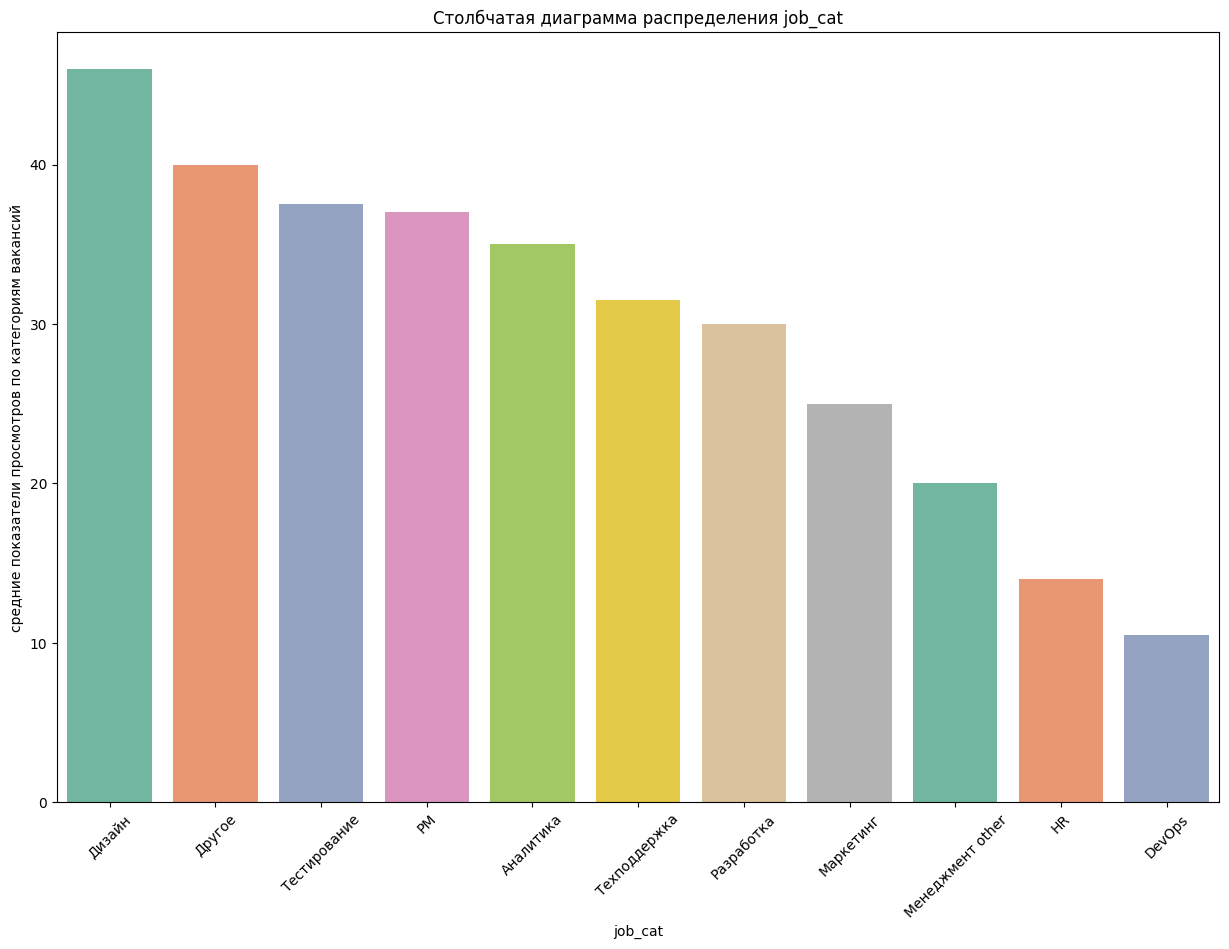

In [46]:
response = dteda.pivot_table(index='job_cat',
                                 values='views',
                                 aggfunc='median').reset_index()

function_seaborn(table=response, x='job_cat', y='views', ytitle='средние показатели просмотров по категориям вакансий')

Самые высокие средние показатели просмотра по категориям вакансий - в категории "Дизайн". Присутствие этой категории по количеству вакансий - менее 6%. Очевиден дефицит предложения в этой категории.

#### Конверсия просмотров в отклики по категориям

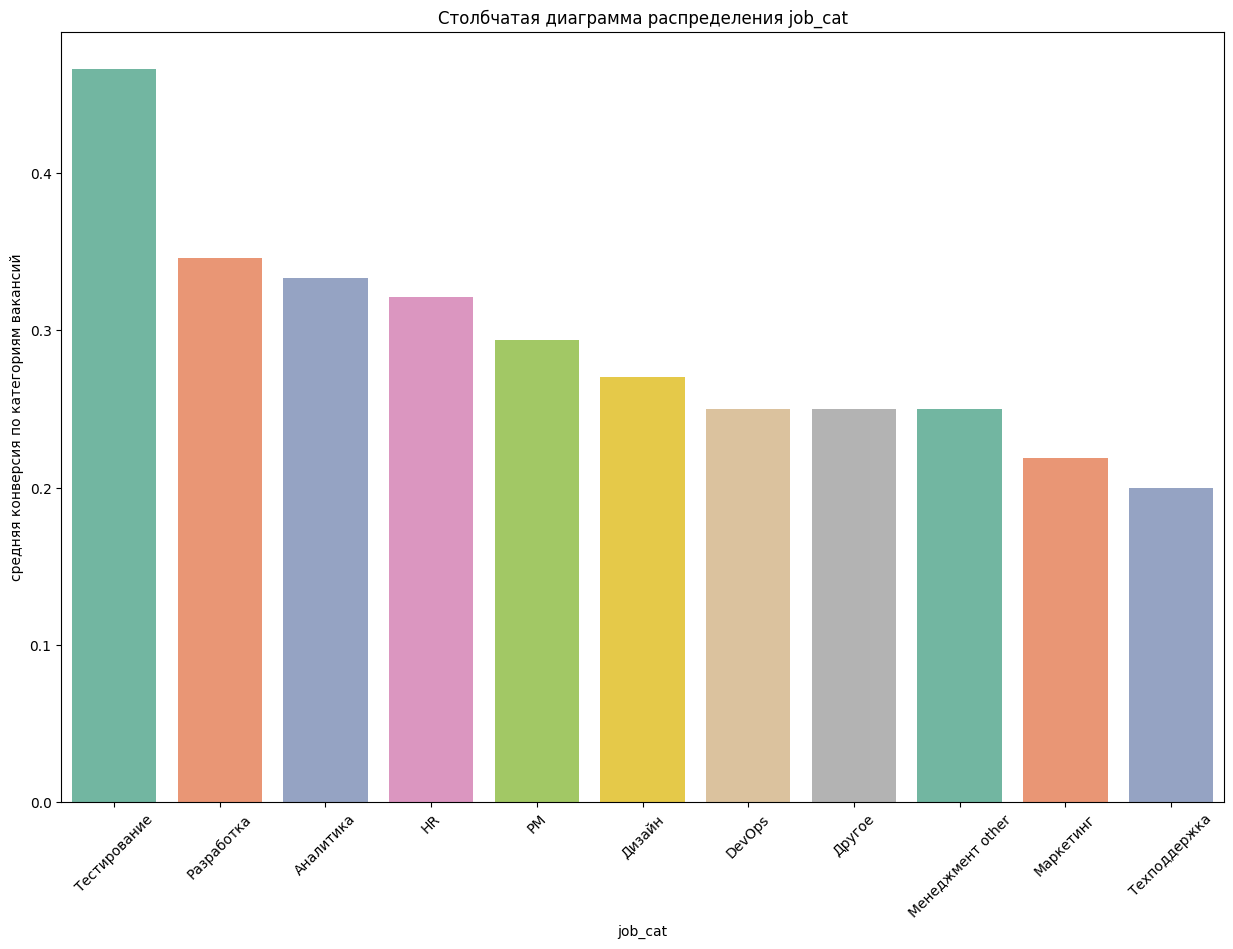

In [47]:
response = dteda.pivot_table(index='job_cat',
                                 values='conv',
                                 aggfunc='median').reset_index()

function_seaborn(table=response, x='job_cat', y='conv', ytitle='средняя конверсия по категориям вакансий')

Примечательно, что внутри IT очень существенные различия по отзывчивости кандидатов. Тестировщики откликаются в почти в половине случаев, техподдержка - почти в 2 раза реже.

#Особенности вакансий в разделе Project Manager


## Описание данных

In [48]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 6 to 1290
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               147 non-null    int64  
 1   status           147 non-null    object 
 2   lead_source      145 non-null    object 
 3   manager          143 non-null    object 
 4   start_date       147 non-null    object 
 5   end_date         138 non-null    object 
 6   views            147 non-null    int64  
 7   responses        147 non-null    int64  
 8   emp_brand        147 non-null    object 
 9   job_title        147 non-null    object 
 10  courses          147 non-null    object 
 11  salary_min       69 non-null     float64
 12  salary_max       58 non-null     float64
 13  city             147 non-null    object 
 14  contract         147 non-null    object 
 15  format           147 non-null    object 
 16  experience       147 non-null    object 
 17  education      

In [49]:
dataset_info(df_pm)

Название столбца:      id
Длина столбца:         147
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[ 282  284  288  307  322  325  341  376  378  391  413  434  452  468
  495  504  507  509  522  525  539  547  550  562  569  578  580  586
  590  593  646  655  671  692  704  706  712  721  723  732  748  755
  781  791  795  805  811  824  843  848  852  886  888  900  901  908
  923  941  956  957  974  982  983  990 1010 1033 1039 1044 1071 1074
 1083 1085 1094 1099 1111 1136 1157 1163 1173 1176 1182 1186 1197 1234
 1235 1245 1257 1274 1284 1286 1319 1320 1335 1340 1343 1358 1361 1372
 1374 1380 1409 1413 1466 1471 1501 1503 1521 1525 1561 1567 1574 1581
 1584 1600 1603 1613 1623 1643 1644 1645 1647 1657 1678 1696 1712 1713
 1725 1736 1763 1767 1773 1774 1781 1795 1807 1824 1846 1863 1878 1893
 1909 1920 1960 1981 2031 2040 2061]
Количество уникальных значений:  147
----------------
Название столбца:      status
Длина столбца:         147
Количество п

##Исследовательский аналаз данных

Посмотрим как распределен признак "конверсия" у этой категории вакансий

In [50]:
fig = px.histogram(df_pm,
                     x= 'conv',
                     marginal = 'box',
                     title='Гистограмма распределения метрики конверсии')
fig.update_layout(yaxis_title_text = 'Количество вакансий',
                  xaxis_title_text = 'Конверсия')
fig.show()

Датасет маленький, поэтому гистограмма получается ступенчатой, контуры отдаленно напоминают нормальное распределение и есть намек на то, что нужно присмотреться с случаям 100% конверсией, что дальше обязательно сделаем.

In [51]:
df_pm['conv'].describe()

count    147.000000
mean       0.321479
std        0.194386
min        0.023256
25%        0.200000
50%        0.294118
75%        0.410428
max        1.000000
Name: conv, dtype: float64

#####Анализ показателей конверсии, определение уровней

**Выводы** Медиана и среднее близко, почти совпадают, возьмем медиану.  

In [52]:
print('показатели конверсии в этой группе вакансий')
print("очень низкий уровень: менее ",df_pm['conv'].quantile(1/4).round(2))
print("низкий уровень: oт ",df_pm['conv'].quantile(1/4).round(2), "до", df_pm['conv'].quantile(1/3).round(2))
print("ниже среднего: oт ",df_pm['conv'].quantile(1/3).round(2), "до", df_pm['conv'].quantile(1/2).round(2))
print("средний уровень: oт ",df_pm['conv'].quantile(1/2).round(2), "до", df_pm['conv'].mean().round(2))
print("выше среднего: oт ",df_pm['conv'].mean().round(2), "до", df_pm['conv'].quantile(2/3).round(2))
print("высокий: oт ",df_pm['conv'].quantile(2/3).round(2), "до", df_pm['conv'].quantile(3/4).round(2))
print("очень высокий: более ",df_pm['conv'].quantile(3/4).round(2))

показатели конверсии в этой группе вакансий
очень низкий уровень: менее  0.2
низкий уровень: oт  0.2 до 0.22
ниже среднего: oт  0.22 до 0.29
средний уровень: oт  0.29 до 0.32
выше среднего: oт  0.32 до 0.35
высокий: oт  0.35 до 0.41
очень высокий: более  0.41


Создадим новый столбец, показывающий привлекательность вакансии ('attractive') в зависимости от конверсии.
Введем три категории:

*   **Низкая привлекательность**,включает низкий и очень низкий уровень (low)
*   **Средняя привлекательность** средний уровень и вокруг среднего (middle)
*   **Высокая привлекательность**, включает высокий и очень высокий уровень конверсии)(high)


Разделим столбец с конверсией на три части с помощью квантилей.

In [53]:
# Определение квантилей для разбиения на категории
low_quantile = df_pm['conv'].quantile(1/3)
high_quantile = df_pm['conv'].quantile(2/3)

display(low_quantile)
high_quantile

0.221677559912854

0.35093167701863337

In [54]:
def categorize_popularity(param):
    # Определение категории популярности
    if param <= low_quantile:
        return "low"
    elif param <= high_quantile:
        return "middle"
    else:
        return "high"

# Применение функции к столбцу "conv" и создание нового столбца с категориями "attractive"
df_pm['attractive'] = df_pm['conv'].apply(categorize_popularity)

Добавим столбец, в котором объединим все текстовые описания вакансии

In [55]:
df_pm['additional']= df_pm['additional'].fillna('или')
#датасет и так невелик, поэтому нашла выход чем нейтральным заполнить пропуски в "additional"

In [56]:
df_pm['language'] = df_pm['mandatory']+df_pm['work_conditions']+df_pm['job_title']+df_pm['additional']


In [57]:
df_pm

id           status      lead_source    manager  start_date  \
6      282            Архив        Повторная   Кариаули  2023-01-10   
8      284            Архив  Входящая заявка        NaN  2023-01-10   
12     288            Архив              NaN        NaN  2023-01-11   
26     307        Отклонена      Реферальная  Фаткуллин  2023-01-16   
33     322        Отклонена          Сорсинг  Фаткуллин  2023-01-18   
...    ...              ...              ...        ...         ...   
1215  1960     Закрыта нами        Повторная   Корягина  2023-11-21   
1232  1981      Акселерация        Повторная  Фаткуллин  2023-11-28   
1269  2031   Преакселерация          Сорсинг  Фаткуллин  2023-12-11   
1275  2040  На рассмотрении        Повторная   Корягина  2023-12-15   
1290  2061      Акселерация        Повторная  Фаткуллин  2023-12-21   

        end_date  views  responses  \
6     2023-03-27     34         10   
8     2023-06-15     99          3   
12    2023-03-02     12          1   
26    2023-03-24     21          9   
33    2023-02-13     22          6   
...          ...    ...        ...   
1215  2023-12-21     42          7   
1232         NaN     16          6   
1269         NaN      2          1   
1275         NaN     14          7   
1290         NaN     20          5   

                                              emp_brand  \
6                                               AppCake   
8     Международная Академия Дополнительного Професс...   
12                           Цифровые стратегии DS.Team   
26                              Московский метрополитен   
33                                  ООО Студия Давыдова   
...                                                 ...   
1215                                              Jobby   
1232                                       Сириус.Курсы   
1269                                             Дом РФ   
1275                                             Neurus   
1290                                     Antipoff group   

                                              job_title  ...  \
6                                junior project manager  ...   
8                                       project-manager  ...   
12                                          pr-менеджер  ...   
26                                      project manager  ...   
33                                      project manager  ...   
...                                                 ...  ...   
1215                           project manager (junior)  ...   
1232                                    project manager  ...   
1269  руководитель направления развитие транзакционн...  ...   
1275                                    project manager  ...   
1290                  стажировка для project менеджеров  ...   

                                              test_task  employment  \
6                                                   NaN      Полная   
8     https://docs.google.com/document/d/1_7EKVFkdiX...      Полная   
12                                                  NaN      Полная   
26                                                  NaN      Полная   
33                                                  NaN      Полная   
...                                                 ...         ...   
1215  https://docs.google.com/document/d/1wlAFgqRCrh...      Полная   
1232                                                NaN      Полная   
1269                                                NaN      Полная   
1275                                                NaN      Полная   
1290                                                NaN  Стажировка   

                                              mandatory  \
6     Разговорный английский язык - уверенный B2 и в...   
8     - Системность, структурность, четкость. Нужен ...   
12    — Заряд энергии и организаторские способности:...   
26    Наличие высшего образования _x000D_\nУверенное...   
33    Hard skills:_x000D_\n- Знание Trello_x000D_\n-...   
...          

Проверим выбросы по признаку конверсия = 100%

In [58]:
strange_vac = df_pm[df_pm['conv'] == 1]

In [59]:
strange_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 171 to 1151
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5 non-null      int64  
 1   status           5 non-null      object 
 2   lead_source      5 non-null      object 
 3   manager          5 non-null      object 
 4   start_date       5 non-null      object 
 5   end_date         5 non-null      object 
 6   views            5 non-null      int64  
 7   responses        5 non-null      int64  
 8   emp_brand        5 non-null      object 
 9   job_title        5 non-null      object 
 10  courses          5 non-null      object 
 11  salary_min       4 non-null      float64
 12  salary_max       2 non-null      float64
 13  city             5 non-null      object 
 14  contract         5 non-null      object 
 15  format           5 non-null      object 
 16  experience       5 non-null      object 
 17  education      

In [60]:
strange_vac.sample(5)

id status lead_source       manager  start_date    end_date  views  \
799   1380  Архив     Сорсинг     Фаткуллин  2023-08-04  2023-09-08      3   
171    495  Архив     Сорсинг  Селиверстова  2023-03-03  2023-04-03      2   
1151  1863  Архив     Сорсинг     Фаткуллин  2023-10-30  2023-11-27      1   
642   1157  Архив     Сорсинг  Селиверстова  2023-07-04  2023-08-15      2   
332    704  Архив     Сорсинг  Селиверстова  2023-04-13  2023-06-26      2   

      responses     emp_brand  \
799           3        PromIT   
171           2  Caroptics.ru   
1151          1       Creatin   
642           2       Sibcode   
332           2    Mark Weber   

                                              job_title  ... test_task  \
799   помощник менеджера проектов (it project manage...  ...       NaN   
171                                   менеджер проектов  ...       NaN   
1151                                    project manager  ...       NaN   
642                                   менеджер проектов  ...       NaN   
332                                   менеджер проектов  ...       NaN   

                                             employment  \
799                                              Полная   
171   Волонтерство, Проектная, Частичная, Стажировка...   
1151                                             Полная   
642                                              Полная   
332                                              Полная   

                                              mandatory  \
799   опыт работы в качестве менеджера проектов, биз...   
171   - опытный пользователь ПК;_x000D_\n- умение ра...   
1151  Понимание того, как строится проект_x000D_\nОс...   
642   - высшее образование в it или курс проектного ...   
332   - психологическая зрелость — способность брать...   

                                             additional  \
799                                                 или   
171   - опыт работы менеджером/администратором IT-пр...   
1151                                                или   
642                                                 или   
332   - опыт работы в маркетинге/digital/управлении ...   

                                            comр_stages  \
799   1. Скрининг резюме _x000D_\n2. Очное собеседов...   
171   1. Скрининг резюме._x000D_\n2. Собеседование с...   
1151  1. Скрининг резюме _x000D_\n2. Собеседование_x...   
642   1. Скрининг резюме. _x000D_\n2. Интервью с нан...   
332   1. Скрининг резюме._x000D_\n2. Тестовое задани...   

                                        work_conditions conv job_cat  \
799   профессиональный рост до Project Manager в сфе...  1.0      PM   
171   - интересная работа в команде;_x000D_\n- дружн...  1.0      PM   
1151  Работа в офисе с 10 до 18 _x000D_\nОформление ...  1.0      PM   
642   - официальное трудоустройство;_x000D_\n- конку...  1.0      PM   
332   - работа в офисе, пятидневка с 9:00 - 18:00;_x...  1.0      PM   

     attractive                                           language  
799        high  опыт работы в качестве менеджера проектов, биз...  
171        high  - опытный пользователь ПК;_x000D_\n- умение ра...  
1151       high  Понимание того, как строится проект_x000D_\nОс...  
642        high  - высшее образование в it или курс проектного ...  
332        high  - психологическая зрелость — способность брать...  

[5 rows x 28 columns]

Это архивные вакансии с минимальным количеством просмотров

##Проверка гипотез

In [61]:
df_hy=df_pm.copy()

In [62]:
# функция для добавления столбца по условию в нужное место ДФ

# new_col - название нового столбца
# new - столбец, в значениях которого проводим поиск
# str - условие для фильтрации
# т - позиция, на которую нужно вставить новый столбец


def columns_contains(df, new_col, col, str, n):
    df[new_col] =  df[col].str.contains(str, na=False)
    df.insert(n, new_col, df.pop(new_col))



#### Гипотезы 1 о влиянии признаков наименований (Junior, Junior+ итд.)

In [63]:
columns_contains(df_hy, 'Junior_all', 'language', 'junior', 28)

In [64]:
columns_contains(df_hy, 'Junior_tag', 'job_title', 'junior', 29)

In [65]:
columns_contains(df_hy, 'Middle_tag', 'job_title', 'middle', 30)

In [66]:
columns_contains(df_hy, 'Middle_all', 'language', 'middle', 31)

In [67]:
columns_contains(df_hy, 'Senior_tag', 'job_title', 'senior', 32)

In [68]:
columns_contains(df_hy, 'Senior_all', 'language', 'senior', 32)

In [69]:
junior_list = [ 'младш','jun','джун','начинающ','джун']

In [70]:
df_hy['junior_list'] = df_hy['language'].str.contains('|'.join(junior_list), na=False)
df_hy.insert(10, 'junior_list', df_hy.pop('junior_list'))


In [71]:
df_hy['Senior_all'].unique().tolist()

[False]

interval columns not set, guessing: ['conv', 'views', 'responses']


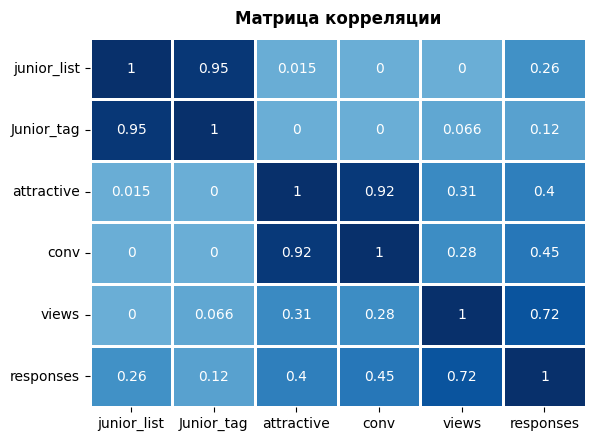

In [72]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['junior_list', 'Junior_tag', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

In [73]:
good_title =['project manager junior', 'cтажер project manager', 'помощник руководителя проекта','руководитель проекта', 'менеджер проекта', 'координатор проекта',
             'менеджер it проектов', 'рroject manager middle']

In [74]:
df_hy['good_title'] = df_hy['job_title'].str.contains('|'.join(good_title), na=False)
df_hy.insert(11, 'good_title', df_hy.pop('good_title'))


In [249]:
df_hy['good_title'].unique().tolist()

[False, True]

In [75]:
df_hy['good_title'].unique().tolist()

[False, True]

In [76]:
bad_title =['senior ', 'тимлидер команды', 'тимлид','cкрам-мастер', 'scrum']

In [77]:
df_hy['bad_title'] = df_hy['job_title'].str.contains('|'.join(bad_title), na=False)
df_hy.insert(12, 'bad_title', df_hy.pop('bad_title'))


In [78]:
df_hy['bad_title'].unique().tolist()

[False]

Плохих примеров в названиях вакансий в нашем датасете нет

In [79]:
df_hy

id           status      lead_source    manager  start_date  \
6      282            Архив        Повторная   Кариаули  2023-01-10   
8      284            Архив  Входящая заявка        NaN  2023-01-10   
12     288            Архив              NaN        NaN  2023-01-11   
26     307        Отклонена      Реферальная  Фаткуллин  2023-01-16   
33     322        Отклонена          Сорсинг  Фаткуллин  2023-01-18   
...    ...              ...              ...        ...         ...   
1215  1960     Закрыта нами        Повторная   Корягина  2023-11-21   
1232  1981      Акселерация        Повторная  Фаткуллин  2023-11-28   
1269  2031   Преакселерация          Сорсинг  Фаткуллин  2023-12-11   
1275  2040  На рассмотрении        Повторная   Корягина  2023-12-15   
1290  2061      Акселерация        Повторная  Фаткуллин  2023-12-21   

        end_date  views  responses  \
6     2023-03-27     34         10   
8     2023-06-15     99          3   
12    2023-03-02     12          1   
26    2023-03-24     21          9   
33    2023-02-13     22          6   
...          ...    ...        ...   
1215  2023-12-21     42          7   
1232         NaN     16          6   
1269         NaN      2          1   
1275         NaN     14          7   
1290         NaN     20          5   

                                              emp_brand  \
6                                               AppCake   
8     Международная Академия Дополнительного Професс...   
12                           Цифровые стратегии DS.Team   
26                              Московский метрополитен   
33                                  ООО Студия Давыдова   
...                                                 ...   
1215                                              Jobby   
1232                                       Сириус.Курсы   
1269                                             Дом РФ   
1275                                             Neurus   
1290                                     Antipoff group   

                                              job_title  ...      conv  \
6                                junior project manager  ...  0.294118   
8                                       project-manager  ...  0.030303   
12                                          pr-менеджер  ...  0.083333   
26                                      project manager  ...  0.428571   
33                                      project manager  ...  0.272727   
...                                                 ...  ...       ...   
1215                           project manager (junior)  ...  0.166667   
1232                                    project manager  ...  0.375000   
1269  руководитель направления развитие транзакционн...  ...  0.500000   
1275                                    project manager  ...  0.500000   
1290                  стажировка для project менеджеров  ...  0.250000   

      job_cat  attractive                                           language  \
6          PM      middle  Разговорный английский язык - уверенный B2 и в...   
8          PM         low  - Системность, структурность, четкость. Нужен ...   
12         PM         low  — Заряд энергии и организаторские способности:...   
26         PM        high  Наличие высшего образования _x000D_\nУверенное...   
33         PM      middle  Hard skills:_x000D_\n- Знание Trello_x000D_\n-...   
...       ...         ...                                                ...   
1215       PM         low  — Внимательность и системность; _x000D_\n— Жел...   
1232       PM        high  Иметь представление об используемых на проекте...   
1269       PM        high  Образование высшее техническое/ИТ/финансы_x000...   
1275       PM        high  — Минимально разбираться в технической части (...   
1290       PM      middle  Понимание процессов разработки и git flow; _x0...   

      Junior_all  Junior_tag Middle_tag Middle_all Senior_all Senior_tag  
6           True        True      False      False      False   

interval columns not set, guessing: ['conv', 'views', 'responses']


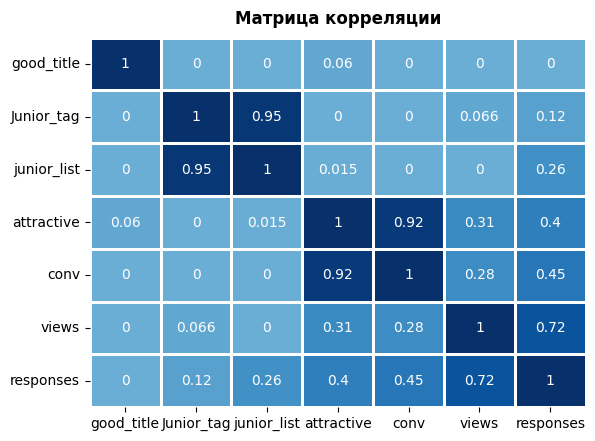

In [254]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['good_title', 'Junior_tag', 'junior_list','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

**Выводы по группе гипотез 1.1- 1.4** Для проверки гипотезы про middle и senior в датасете данных нет, по Junior статистически значимых связей не наблюдается.

#### Гипотеза 2 о признаке "стажировка"

In [266]:
trainee_list = [ 'trainee','стажер','стажиров','практикант', 'intern']

In [267]:
df_hy['trainee_list'] = df_hy['language'].str.contains('|'.join(trainee_list), na=False)
df_hy.insert(31, 'trainee_list', df_hy.pop('trainee_list'))


In [268]:
df_hy['trainee_tag'] = df_hy['job_title'].str.contains('|'.join(trainee_list), na=False)
df_hy.insert(32, 'trainee_tag', df_hy.pop('trainee_tag'))


In [84]:
df_hy

id           status      lead_source    manager  start_date  \
6      282            Архив        Повторная   Кариаули  2023-01-10   
8      284            Архив  Входящая заявка        NaN  2023-01-10   
12     288            Архив              NaN        NaN  2023-01-11   
26     307        Отклонена      Реферальная  Фаткуллин  2023-01-16   
33     322        Отклонена          Сорсинг  Фаткуллин  2023-01-18   
...    ...              ...              ...        ...         ...   
1215  1960     Закрыта нами        Повторная   Корягина  2023-11-21   
1232  1981      Акселерация        Повторная  Фаткуллин  2023-11-28   
1269  2031   Преакселерация          Сорсинг  Фаткуллин  2023-12-11   
1275  2040  На рассмотрении        Повторная   Корягина  2023-12-15   
1290  2061      Акселерация        Повторная  Фаткуллин  2023-12-21   

        end_date  views  responses  \
6     2023-03-27     34         10   
8     2023-06-15     99          3   
12    2023-03-02     12          1   
26    2023-03-24     21          9   
33    2023-02-13     22          6   
...          ...    ...        ...   
1215  2023-12-21     42          7   
1232         NaN     16          6   
1269         NaN      2          1   
1275         NaN     14          7   
1290         NaN     20          5   

                                              emp_brand  \
6                                               AppCake   
8     Международная Академия Дополнительного Професс...   
12                           Цифровые стратегии DS.Team   
26                              Московский метрополитен   
33                                  ООО Студия Давыдова   
...                                                 ...   
1215                                              Jobby   
1232                                       Сириус.Курсы   
1269                                             Дом РФ   
1275                                             Neurus   
1290                                     Antipoff group   

                                              job_title  ...  attractive  \
6                                junior project manager  ...      middle   
8                                       project-manager  ...         low   
12                                          pr-менеджер  ...         low   
26                                      project manager  ...        high   
33                                      project manager  ...      middle   
...                                                 ...  ...         ...   
1215                           project manager (junior)  ...         low   
1232                                    project manager  ...        high   
1269  руководитель направления развитие транзакционн...  ...        high   
1275                                    project manager  ...        high   
1290                  стажировка для project менеджеров  ...      middle   

                                               language  trainee_list  \
6     Разговорный английский язык - уверенный B2 и в...         False   
8     - Системность, структурность, четкость. Нужен ...         False   
12    — Заряд энергии и организаторские способности:...         False   
26    Наличие высшего образования _x000D_\nУверенное...         False   
33    Hard skills:_x000D_\n- Знание Trello_x000D_\n-...          True   
...                                                 ...           ...   
1215  — Внимательность и системность; _x000D_\n— Жел...         False   
1232  Иметь представление об используемых на проекте...         False   
1269  Образование высшее техническое/ИТ/финансы_x000...         False   
1275  — Минимально разбираться в технической части (...         False   
1290  Понимание процессов разработки и git flow; _x0...          True   

     trainee_tag  Junior_all  Junior_tag Middle_tag Middle_all Senior_all  \
6          False        True        True      False      False      False   
8          False       False       False     

interval columns not set, guessing: ['conv', 'views', 'responses']


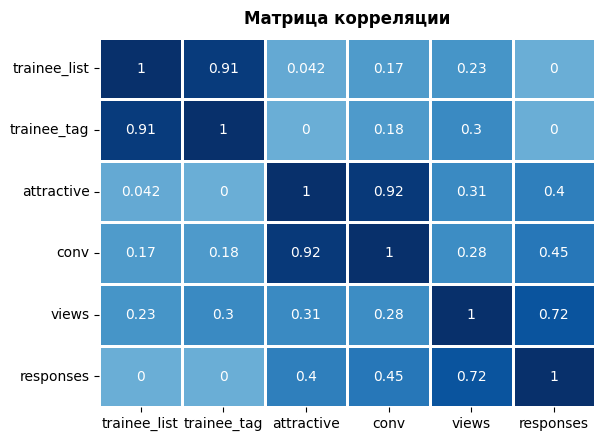

In [269]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['trainee_list', 'trainee_tag', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

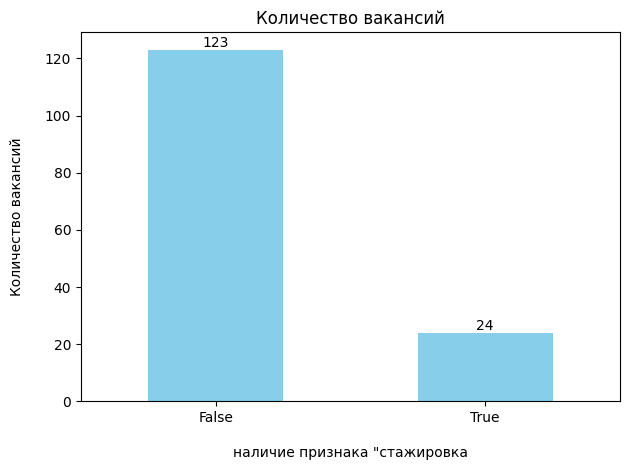

In [86]:


features_counts = df_hy['trainee_list'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "стажировка', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Гипотеза о признаках методологии управления проектами  3.1

In [87]:
agile_list = [ 'agile','scrum','kanban','waterfall','брифинг', 'daily', 'meet','backlog','бэклог','релиз', 'release']

In [88]:
method_list = [ 'scrum','kanban','waterfall','брифинг', 'daily', 'meet','backlog','бэклог','релиз', 'release']

In [89]:
df_hy['agile_list'] = df_hy['language'].str.contains('|'.join(agile_list), na=False)
df_hy.insert(33, 'agile_list', df_hy.pop('agile_list'))


In [90]:
df_hy['method_list'] = df_hy['language'].str.contains('|'.join(method_list), na=False)
df_hy.insert(34, 'method_list', df_hy.pop('method_list'))


interval columns not set, guessing: ['conv', 'views', 'responses']


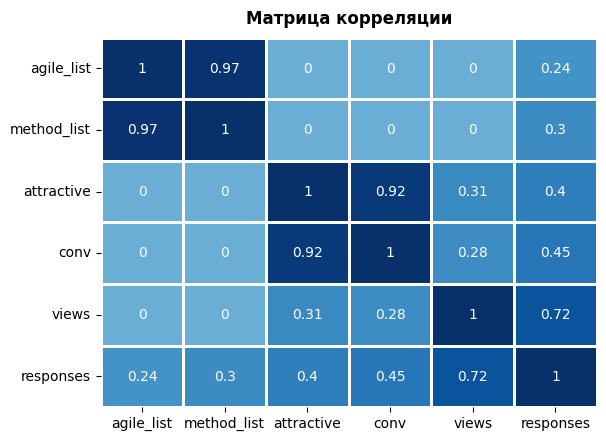

In [91]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['agile_list', 'method_list', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

**Выводы** тенденция не противоречит гипотезе, но связь слабая

#### Гипотезы 4: технологии. ПО

In [92]:
good_list_all = [ 'microsoft office', 'google docs', 'notion', 'miro', 'confluence','trello','exсel', 'яндекс. метрика', 'google analytics','gantpro', 'kaiten', 'jira', 'figma', 'agile','scrum','kanban']

In [93]:
bad_list_all = ['crm', 'битрикс24', 'bitrix24', 'activecollab', 'яндекс директ', 'sql', 'powerbi', 'illustrator']

In [94]:
df_hy['good_list_all'] = df_hy['language'].str.contains('|'.join(good_list_all), na=False)
df_hy.insert(35, 'good_list_all', df_hy.pop('good_list_all'))


In [95]:
df_hy['bad_list_all'] = df_hy['language'].str.contains('|'.join(bad_list_all), na=False)
df_hy.insert(36, 'bad_list_all', df_hy.pop('bad_list_all'))


interval columns not set, guessing: ['conv', 'views', 'responses']


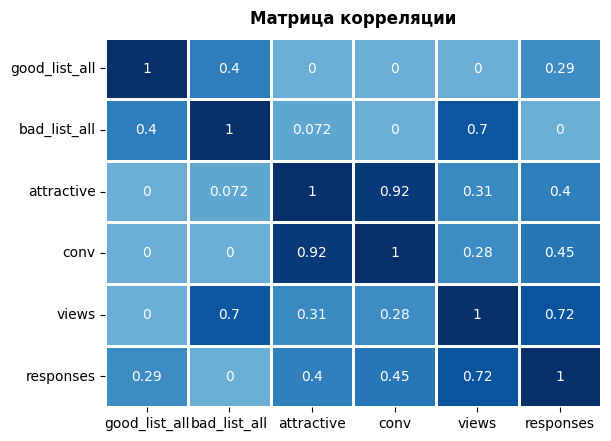

In [96]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['good_list_all', 'bad_list_all', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

**Выводы** Влияние хорошего списка на отклики и конверсию выше, чем плохого, но в целом слабое.
**Загадка** У "плохого списка" корреляция с высокими просмотрами. Вероятно, какой-то сильный бренд работодателя дает объявления с этим неудобным стеком, их смотрят хорошо, но не откликаются. Если успею - посомотрю подробнее.

Попробуем убрать из списков софт, который более общего назначения (MS office, excel) и оставить специфичный и добавить возможные варианты написания  

In [97]:
good_list_short = [ 'notion', 'miro', 'confluence','trello', 'google analytics','gantpro', 'kaiten', 'jira', 'figma', 'agile','scrum','kanban']

In [98]:
bad_list_short = ['crm', 'битрикс24', 'bitrix24', 'activecollab', 'sql', 'powerbi', 'illustrator']

In [99]:
df_hy['good_list_short'] = df_hy['language'].str.contains('|'.join(good_list_short), na=False)
df_hy.insert(38, 'good_list_short', df_hy.pop('good_list_short'))


In [100]:
df_hy['bad_list_short'] = df_hy['language'].str.contains('|'.join(bad_list_short), na=False)
df_hy.insert(38, 'bad_list_short', df_hy.pop('bad_list_short'))


interval columns not set, guessing: ['conv', 'views', 'responses']


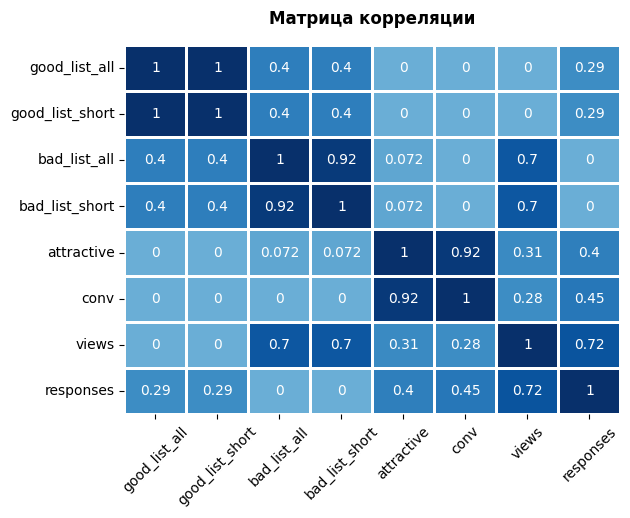

In [101]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['good_list_all', 'good_list_short', 'bad_list_all', 'bad_list_short','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [102]:
sql_list = ['sql']

In [103]:
df_hy['sql_list'] = df_hy['language'].str.contains('|'.join(sql_list), na=False)
df_hy.insert(39, 'sql_list', df_hy.pop('sql_list'))


In [104]:
df_hy['sql_list'].unique().tolist()

[False]

In [105]:
crm_list = ['crm']

In [106]:
df_hy['crm_list'] = df_hy['language'].str.contains('|'.join(crm_list), na=False)
df_hy.insert(40, 'crm_list', df_hy.pop('crm_list'))


In [107]:
df_hy['crm_list'].unique().tolist()

[False, True]

In [108]:
bad_list_new = ['битрикс24', 'bitrix24', 'activecollab', 'sql', 'powerbi', 'illustrator']

In [109]:
df_hy['bad_list_new'] = df_hy['language'].str.contains('|'.join(bad_list_new), na=False)
df_hy.insert(41, 'bad_list_new', df_hy.pop('bad_list_new'))


In [110]:
df_hy['bad_list_new'].unique().tolist()

[False]

interval columns not set, guessing: ['conv', 'views', 'responses']


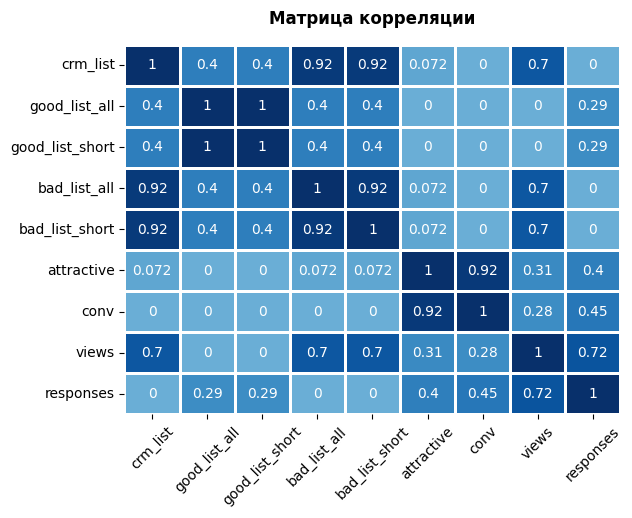

In [111]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['crm_list', 'bad_list_new', 'good_list_all', 'good_list_short', 'bad_list_all', 'bad_list_short','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

interval columns not set, guessing: ['conv', 'views', 'responses']


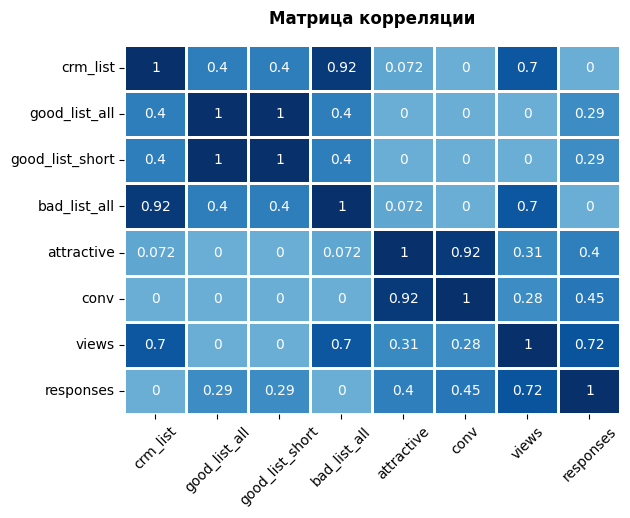

In [315]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['crm_list', 'good_list_all', 'good_list_short', 'bad_list_all', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

####Гипотезы 6 Формат работы (удаленка, офис...

Отдельно из списка выделим признак "удаленка, офис и гибрид", как в гипотезах

In [112]:
columns_contains(df_hy, 'удаленка', 'format', 'Удаленка', 19)

In [113]:
columns_contains(df_hy, 'гибрид', 'format', 'Гибрид', 20)

In [114]:
columns_contains(df_hy, 'офис', 'format', 'Офис', 21)

In [115]:
df_hy['удаленка'].value_counts()

True     88
False    59
Name: удаленка, dtype: int64

In [116]:
df_hy['офис'].value_counts()

False    83
True     64
Name: офис, dtype: int64

In [117]:
df_hy['гибрид'].value_counts()

False    89
True     58
Name: гибрид, dtype: int64

interval columns not set, guessing: ['conv', 'views', 'responses']


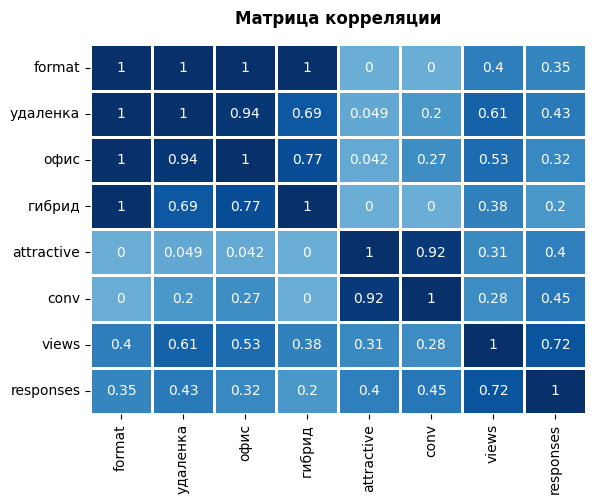

In [248]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['format', 'удаленка', 'офис', 'гибрид', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=90)
plt.show();

Можно наблюдать тенденции влияния формата работы, но не сильные

####Гипотеза об уровне английского языка (Номер 5.1-

In [119]:
english_any = ['английск', 'english']

In [120]:
df_hy['english_any'] = df_hy['language'].str.contains('|'.join(english_any), na=False)
df_hy.insert(20, 'english_any', df_hy.pop('english_any'))


In [121]:
df_hy['english_any'].unique().tolist()

[True, False]

In [122]:
english_low = ['A1', 'A2','begginer', 'elementary', 'pre-intermediate', 'intermediate','B1']

In [123]:
df_hy['english_low'] = df_hy['language'].str.contains('|'.join(english_low), na=False)
df_hy.insert(21, 'english_low', df_hy.pop('english_low'))


In [124]:
df_hy['english_low'].unique().tolist()

[False, True]

In [125]:
english_high = ['C1', 'C2','advanced', 'upper-intermediate', 'intermediate','B2']

In [126]:
df_hy['english_high'] = df_hy['language'].str.contains('|'.join(english_high), na=False)
df_hy.insert(22, 'english_high', df_hy.pop('english_high'))


In [127]:
df_hy['english_high'].unique().tolist()

[True, False]

interval columns not set, guessing: ['conv', 'views', 'responses']


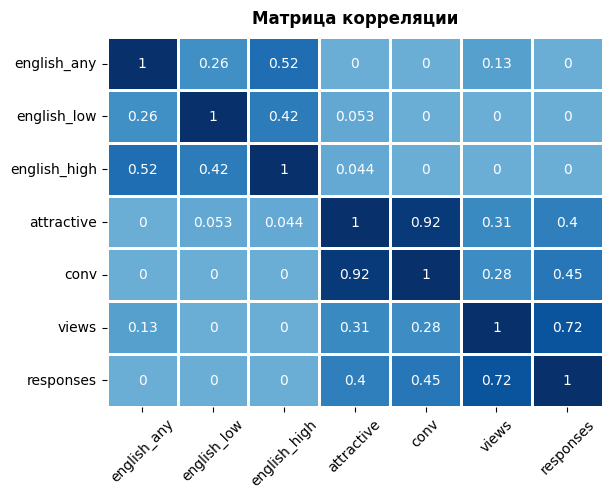

In [128]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['english_any', 'english_low', 'english_high', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=45)
plt.show();

####Гипотеза 9: зарплата

interval columns not set, guessing: ['salary_min', 'salary_max', 'conv', 'views', 'responses']


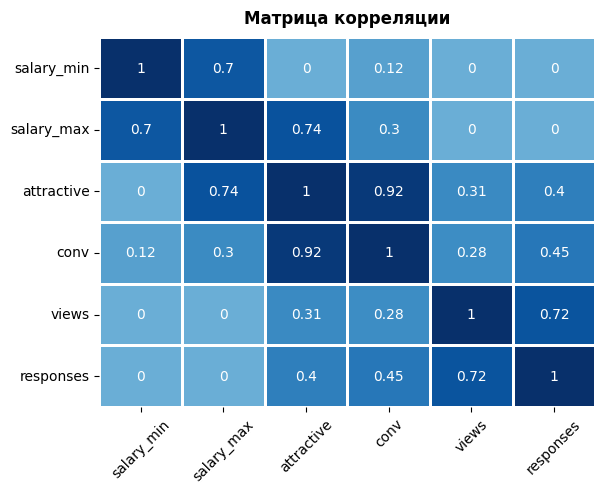

In [301]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['salary_min', 'salary_max', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=45)
plt.show();

In [299]:
print ('значениея минимальной заработной платы:', df_hy['salary_min'].unique())
print(df_hy.groupby('salary_min')['salary_min'].count())
print('количество пропусков', df_hy['salary_min'].isna().sum())


значениея минимальной заработной платы: [   nan 50000. 95000. 40000. 80000. 70000. 20000. 30000. 35000. 60000.
 42000. 25000. 90000. 10000. 15000. 28000. 39000.]
salary_min
10000.0     1
15000.0     1
20000.0     7
25000.0     1
28000.0     1
30000.0    15
35000.0     2
39000.0     1
40000.0    18
42000.0     1
50000.0     6
60000.0     9
70000.0     1
80000.0     3
90000.0     1
95000.0     1
Name: salary_min, dtype: int64
количество пропусков 78


In [302]:
print ('значениея максимальной заработной платы:', df_hy['salary_max'].unique())
print(df_hy.groupby('salary_max')['salary_max'].count())
print('количество пропусков', df_hy['salary_max'].isna().sum())


значениея максимальной заработной платы: [    nan  95000.  80000. 160000.  50000.  70000. 100000.  25000.  42000.
  30000.  40000.  60000.  65000.  45000. 140000.  55000. 150000.  47000.
  84000. 110000.]
salary_max
25000.0      2
30000.0      2
40000.0      4
42000.0      1
45000.0      1
47000.0      1
50000.0     10
55000.0      1
60000.0      7
65000.0      1
70000.0      7
80000.0      8
84000.0      1
95000.0      1
100000.0     6
110000.0     1
140000.0     2
150000.0     1
160000.0     1
Name: salary_max, dtype: int64
количество пропусков 89


In [310]:

print(df_hy.groupby('attractive')['salary_max'].median().round())
#print('количество пропусков', df_hy['salary_max'].isna().sum())


attractive
high      80000.0
low       50000.0
middle    60000.0
Name: salary_max, dtype: float64


In [314]:

df_hy.groupby('attractive')['salary_max'].mean().round()
#print('количество пропусков', df_hy['salary_max'].isna().sum())


attractive
high      81312.0
low       59100.0
middle    71364.0
Name: salary_max, dtype: float64

####Гипотезы 7 город

interval columns not set, guessing: ['conv', 'views', 'responses']


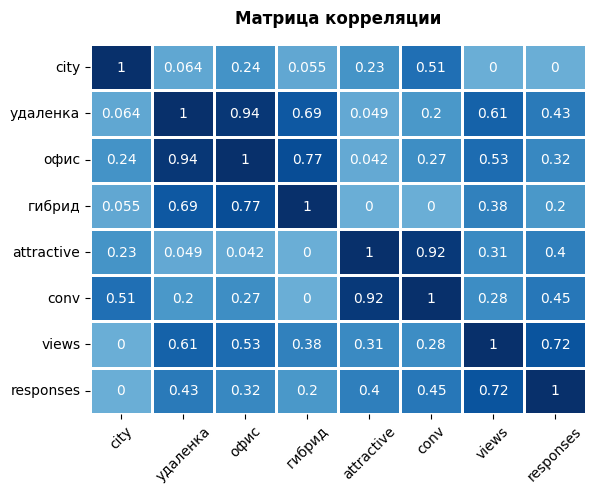

In [129]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['city', 'удаленка', 'офис', 'гибрид', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

Намечается связь города с конверсией и "сонаправленность" c офисом. Но какой же это город? Проверим города из гипотезы.

In [130]:
columns_contains(df_hy, 'москва', 'city', 'Москва', 10)

In [131]:
df_hy['москва'].value_counts()

True     99
False    48
Name: москва, dtype: int64

In [132]:
columns_contains(df_hy, 'петербург', 'city', 'Санкт-Петербург', 11)

In [133]:
df_hy['петербург'].value_counts()

False    123
True      24
Name: петербург, dtype: int64

In [134]:
columns_contains(df_hy, 'екатеринбург', 'city', 'Екатеринбург', 12)

In [135]:
df_hy['екатеринбург'].value_counts()

False    141
True       6
Name: екатеринбург, dtype: int64

In [136]:
columns_contains(df_hy, 'нижний', 'city', 'Нижний Новгород', 13)

In [137]:
df_hy['нижний'].value_counts()

False    146
True       1
Name: нижний, dtype: int64

In [138]:
columns_contains(df_hy, 'казань', 'city', 'Казань', 14)

In [139]:
df_hy['казань'].value_counts()

False    139
True       8
Name: казань, dtype: int64

In [140]:
columns_contains(df_hy, 'воронеж', 'city', 'Воронеж', 15)

In [141]:
df_hy['воронеж'].value_counts()

False    144
True       3
Name: воронеж, dtype: int64

In [142]:
columns_contains(df_hy, 'волгоград', 'city', 'Волгоград', 16)

In [143]:
df_hy['волгоград'].value_counts()

False    146
True       1
Name: волгоград, dtype: int64

In [144]:
columns_contains(df_hy, 'тюмень', 'city', 'Тюмень', 17)

In [145]:
df_hy['тюмень'].value_counts()

False    143
True       4
Name: тюмень, dtype: int64

In [146]:
# columns_contains(df_hy, 'удаленка', 'city', 'Удаленка', 18)

In [147]:
# .value_counts()

interval columns not set, guessing: ['conv', 'views', 'responses']


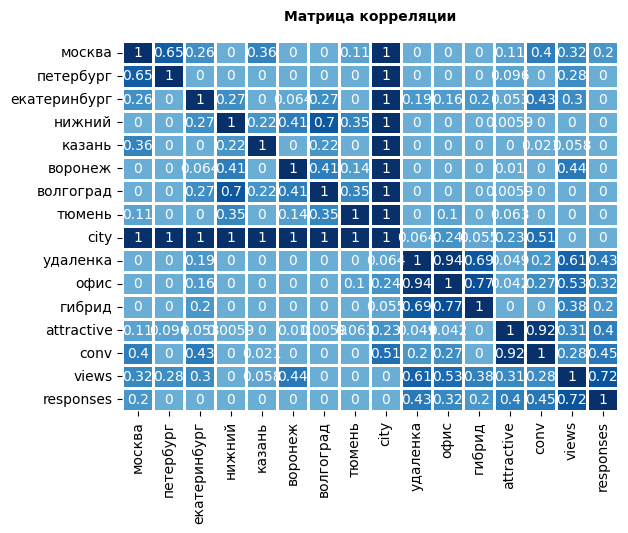

In [148]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['москва', 'петербург', 'екатеринбург', 'нижний', 'казань', 'воронеж', 'волгоград', 'тюмень', 'city', 'удаленка', 'офис', 'гибрид', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=10, fontweight='bold', pad=15)
plt.xticks(rotation=90)
plt.show();

Наблюдаются слабые признаки влияния городов "Москва" и "Екатеринбург"

#### Гипотеза 10: образование

interval columns not set, guessing: ['conv', 'views', 'responses']


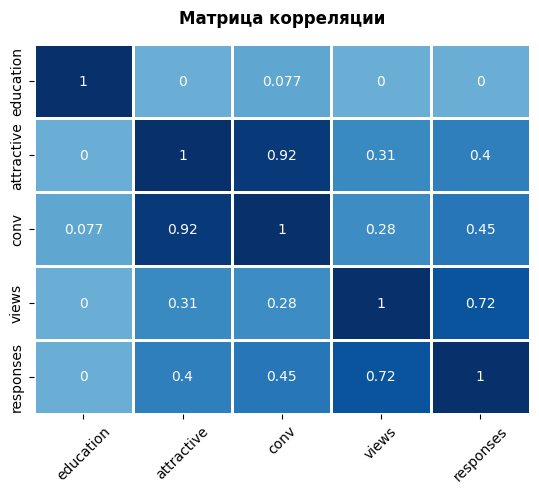

In [294]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['education', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [352]:
df_hy['education'].value_counts()

Другое, Около-релевантное (например, техническое образование для разработчика или QA, общее бизнес образование для маркетолога), Профильное (например, ИТ образование для разработчика)    143
Около-релевантное (например, техническое образование для разработчика или QA, общее бизнес образование для маркетолога), Профильное (например, ИТ образование для разработчика)              4
Name: education, dtype: int64

####Гипотеза 8: формат оформления (контракт)

interval columns not set, guessing: ['conv', 'views', 'responses']


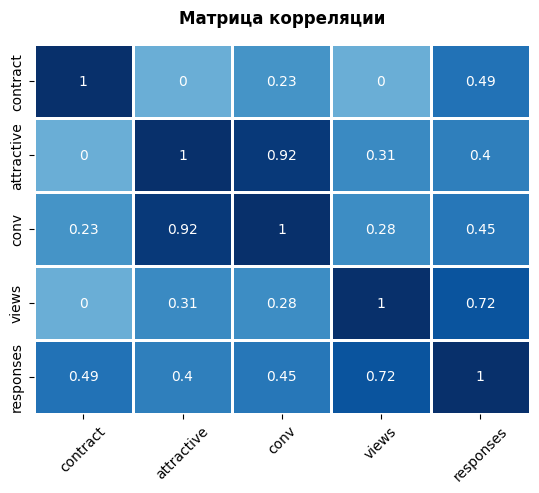

In [324]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['contract', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [325]:
df_hy['contract'].value_counts()

ИП, ГПХ, Самозанятость, Контракт, Трудовой договор    52
Трудовой договор                                      34
Самозанятость                                         14
Самозанятость, ИП                                      7
Контракт                                               6
Самозанятость, ИП, Трудовой договор                    4
Самозанятость, Трудовой договор                        4
Трудовой договор, ГПХ                                  4
ГПХ                                                    4
Самозанятость, Контракт, ИП, ГПХ                       3
Самозанятость, ИП, ГПХ                                 3
Самозанятость, Трудовой договор, ГПХ                   2
Контракт, Трудовой договор                             2
Самозанятость, ГПХ                                     2
Самозанятость, ИП, Трудовой договор, ГПХ               2
ИП, ГПХ                                                1
Контракт, ГПХ                                          1
Самозанятость, Контракт, Трудов

In [326]:
columns_contains(df_hy, 'Трудовой_договор', 'contract', 'Трудовой договор', 18)

In [330]:
columns_contains(df_hy, 'Самозанятость', 'contract', 'Самозанятость', 19)


In [332]:
df_hy['Самозанятость'].value_counts()


True     95
False    52
Name: Самозанятость, dtype: int64

In [334]:
columns_contains(df_hy, 'ИП', 'contract', 'ИП', 20)


In [336]:
columns_contains(df_hy, 'ГПХ', 'contract', 'ГПХ', 21)


In [338]:
columns_contains(df_hy, 'Контракт', 'contract', 'Контракт', 22)


interval columns not set, guessing: ['conv', 'views', 'responses']


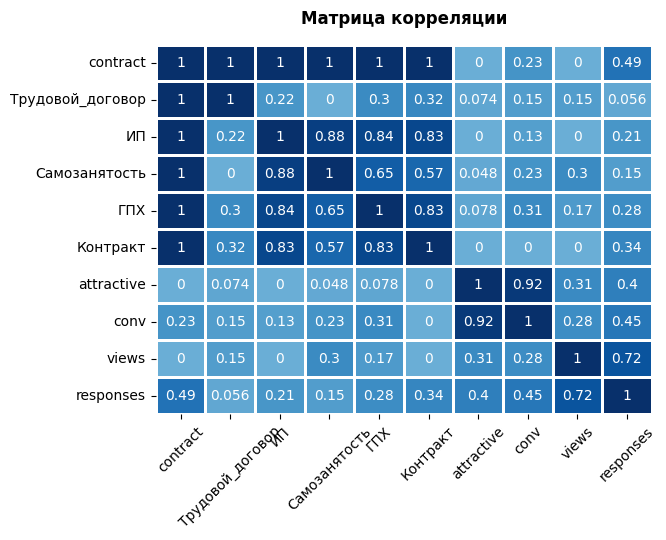

In [339]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['contract', 'Трудовой_договор','ИП','Самозанятость', 'ГПХ', 'Контракт','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

####Гипотезы 11: занятость

In [353]:
df_hy['employment'].value_counts()

Полная                                                    109
Проектная, Частичная                                        9
Волонтерство, Проектная, Частичная, Стажировка, Полная      7
Стажировка                                                  5
Частичная                                                   4
Частичная, Полная                                           2
Стажировка, Полная                                          2
Стажировка, Волонтерство, Частичная                         1
Стажировка, Волонтерство, Проектная                         1
Стажировка, Волонтерство, Проектная, Частичная              1
Стажировка, Проектная, Полная                               1
Проектная, Частичная, Полная                                1
Стажировка, Волонтерство                                    1
Проектная                                                   1
Стажировка, Проектная, Частичная                            1
Стажировка, Частичная                                       1
Name: em

interval columns not set, guessing: ['conv', 'views', 'responses']


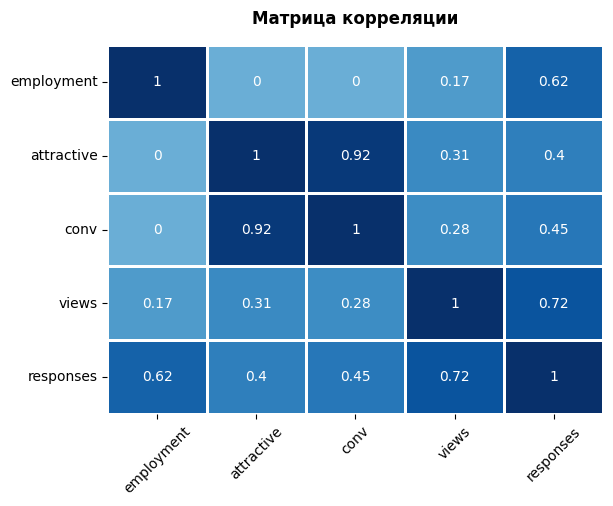

In [354]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['employment', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [356]:

columns_contains(df_hy, 'Полная', 'employment', 'Полная', 20)
df_hy['Полная'].value_counts()

True     122
False     25
Name: Полная, dtype: int64

In [357]:
columns_contains(df_hy, 'Проектная', 'employment', 'Проектная', 20)
df_hy['Проектная'].value_counts()

False    125
True      22
Name: Проектная, dtype: int64

In [358]:
columns_contains(df_hy, 'Частичная', 'employment', 'Частичная', 20)
df_hy['Частичная'].value_counts()


False    120
True      27
Name: Частичная, dtype: int64

In [360]:
columns_contains(df_hy, 'Волонтерство', 'employment', 'Волонтерство', 20)
df_hy['Волонтерство'].value_counts()

False    136
True      11
Name: Волонтерство, dtype: int64

In [361]:
columns_contains(df_hy, 'Стажировка', 'employment', 'Стажировка', 20)
df_hy['Стажировка'].value_counts()


False    126
True      21
Name: Стажировка, dtype: int64

interval columns not set, guessing: ['conv', 'views', 'responses']


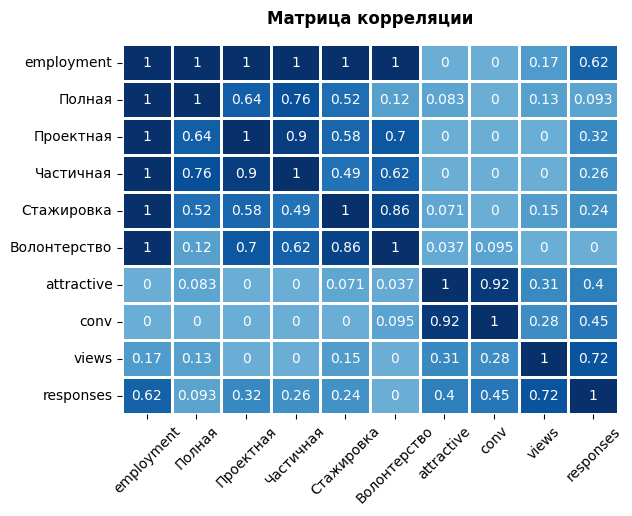

In [364]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['employment', 'Полная', 'Проектная', 'Частичная', 'Стажировка', 'Волонтерство','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

####Гипотезы 12: прототипирование и дизайн

In [368]:
proto_best = [ 'ui/ux', 'референс', 'referеnce']

In [375]:
df_hy['proto_best'] = df_hy['language'].str.contains('|'.join(proto_best), na=False)
df_hy.insert(10, 'proto_best', df_hy.pop('proto_best'))


In [383]:
df_hy['proto_best'].value_counts()

False    147
Name: proto_best, dtype: int64

In [385]:
df_hy['proto_bad'].value_counts()

False    121
True      26
Name: proto_bad, dtype: int64

In [380]:
proto_bad = [ 'smm', 'реклам', 'маркет']

In [381]:
df_hy['proto_bad'] = df_hy['language'].str.contains('|'.join(proto_bad), na=False)
df_hy.insert(10, 'proto_bad', df_hy.pop('proto_bad'))


interval columns not set, guessing: ['conv', 'views', 'responses']


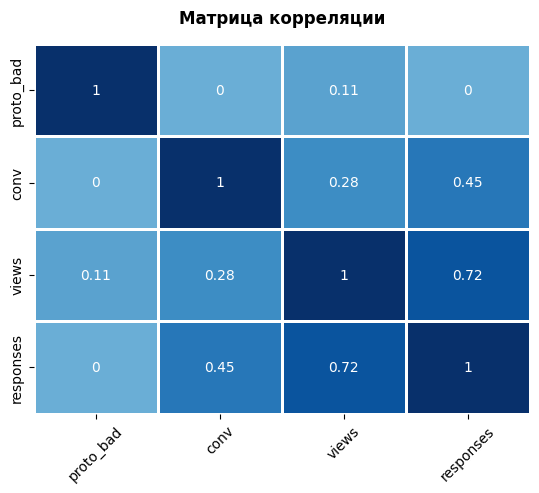

In [384]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['proto_bad', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

####Гипотезы 13: менторство, наставник

In [390]:
mentor = [ 'mentor', 'настав', 'ментор']

In [391]:
df_hy['mentor'] = df_hy['language'].str.contains('|'.join(mentor), na=False)
df_hy.insert(10, 'mentor', df_hy.pop('mentor'))


In [392]:
df_hy['mentor'].value_counts()

False    124
True      23
Name: mentor, dtype: int64

interval columns not set, guessing: ['conv', 'views', 'responses']


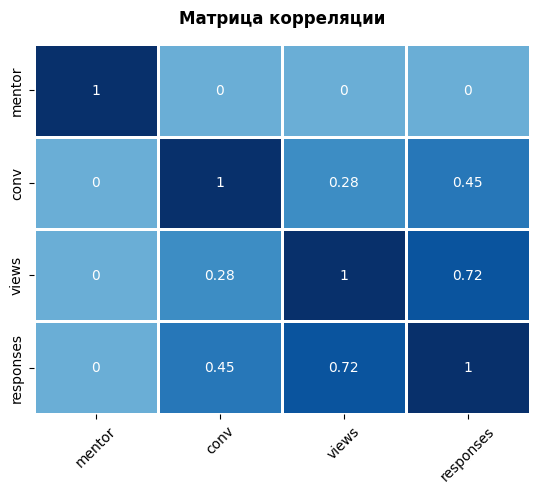

In [393]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['mentor', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

####Гипотеза 14: некоммерческий опыт

In [394]:
nonprofit = [ 'не коммерч', 'некоммерч']

In [395]:
df_hy['nonprofit'] = df_hy['language'].str.contains('|'.join(nonprofit), na=False)
df_hy.insert(10, 'nonprofit', df_hy.pop('nonprofit'))


In [396]:
df_hy['nonprofit'].value_counts()

False    142
True       5
Name: nonprofit, dtype: int64

interval columns not set, guessing: ['conv', 'views', 'responses']


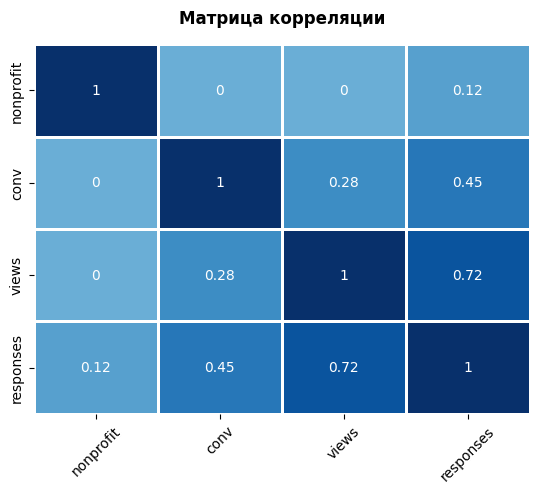

In [397]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['nonprofit', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

####Гипотеза 15: опыт, категории

In [399]:
df_hy['experience'].value_counts()

Около-релевантный (Pet-проекты, open-source, волонтёрские проекты), Релевантный (опыт работы, стажировки, командные проекты), Есть только учебный опыт в Практикуме    131
Около-релевантный (Pet-проекты, open-source, волонтёрские проекты), Релевантный (опыт работы, стажировки, командные проекты)                                            12
Релевантный (опыт работы, стажировки, командные проекты)                                                                                                                 4
Name: experience, dtype: int64

interval columns not set, guessing: ['conv', 'views', 'responses']


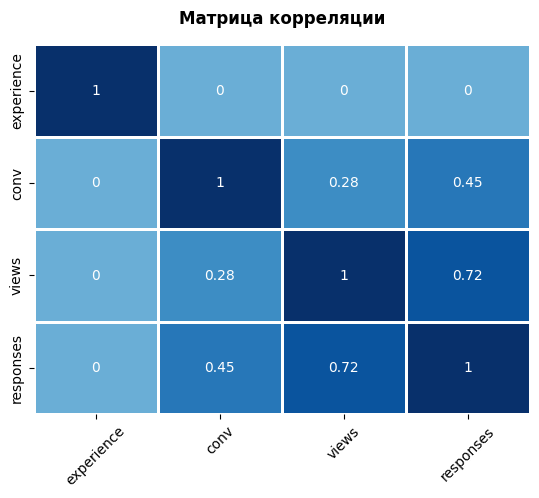

In [400]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['experience', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

##NLP методы

---



###"Мешок слов"

Для начала попробуем применить сравнительно простые и быстро работающие NLP методы. "Мешок слов" - упрощенное представление текста, в котором важно только количество (частота присутствия) слов, но их порядок в предложениях не может быть учтен. В качестве инструмента визуализации будем использовать Wordcloud.

In [149]:
dv=df_pm.copy() #делаем отдельную копию датасета для работы с этим разделом

In [150]:
print(dv.isna().sum())

id                   0
status               0
lead_source          2
manager              4
start_date           0
end_date             9
views                0
responses            0
emp_brand            0
job_title            0
courses              0
salary_min          78
salary_max          89
city                 0
contract             0
format               0
experience           0
education            0
test_task          133
employment           0
mandatory            0
additional           0
comр_stages          0
work_conditions      0
conv                 0
job_cat              0
attractive           0
language             0
dtype: int64


####Функции для предварительной обработки текста (Text preprocessing)

In [151]:
# Загрузка стоп-слов (убираются высокочастотные слова, не несущие специфичного смысла)
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
morph = MorphAnalyzer() # морфологический анализатор для русского языка, написанный на языке Python

In [153]:
# Функция для лемматизации слов - слова заменяются на основную словоформу
def lemmatize_words(text, morph):
    words = word_tokenize(text)
    lemmatized_words = [morph.parse(word)[0].normal_form for word in words]
    return ' '.join(lemmatized_words)

При рассмотрении текстов после лемматизации были обнаружены лишние токены (например _x000В_), поэтому добавляется дополнительная функция обработки текста с помощью регулярных выражений.

In [154]:
# set regular expressions for text preprocessing
HTML = r'<.*?>' # html tags
COMMENTS = r'[\(\[][A-Za-z ]+[\)\]]' # comments in parentheses
LETTERS = r'[^\w\s]+[а-яА-Я]' #any letter
SPACES = r'([ ])\1+' # repeated spaces
DOTS = r'[\.]+' # punctuation mark ellipsis
SYMB = r"[^\w\d'\s]" # punctuation marks other than apostrophe

In [488]:

def dataset_clean(x, nan_value= None):
    for column in x:
        txt = re.sub(HTML, ' ', x) # html tags change to spaces
        #txt = re.sub(COMMENTS, ' ', txt) # comments in parentheses change to spaces
        #txt = re.sub(LETTERS, ' ', txt) # anything that isn't a letter is a space
        txt = re.sub(DOTS, r'.', txt) # punctuation mark ellipsis change to dots
        txt = re.sub(SPACES, r'\1', txt) # repeated spaces change to one space
        #txt = re.sub(SYMB, '', txt) # punctuation marks other than apostrophe change to an empty string
        txt = re.sub('_x000d_', '', txt) # 'www' change to an empty string
        #txt = txt.lstrip().rstrip().replace("\n","") # left space trimming
        #txt = txt.encode('ascii', 'ignore').decode() # remove all non-ascii characters
        #txt = txt.lower() # to lowercase
        txt = ' '.join(txt.split())
    return txt

In [156]:
# Создадим функцию для построения облака слов
def function_worldcloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [157]:
# Инициализация стоп-слов
stop_words = set(stopwords.words('russian'))

# Добавление собственных вариантов к списку стоп-слов
custom_stop_words = set(['работа', 'работать'])

# Объединение стандартных и собственных стоп-слов
stop_words = stop_words.union(custom_stop_words)

# Инициализация лемматизатора и морфологического анализатора
morph = pymorphy2.MorphAnalyzer()
lemmatizer = WordNetLemmatizer()

# Функция для токенизации, лемматизации и удаления стоп-слов
def tokenize_lemmatize_and_filter(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(morph.parse(token)[0].normal_form) for token in tokens]
    return [token for token in lemmatized_tokens if token.lower() not in stop_words and token.isalpha()]

# Функция для создания и отображения облака слов
def WC(text):
    wordcloud = WordCloud(background_color='white', width=800, height=600).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    return plt.show()

In [158]:
def get_words_dict(words): #функция словаря
    words_dict = dict()

    for word in words:
        if word in words_dict:
            words_dict[word] = words_dict[word] + 1
        else:
            words_dict[word] = 1
    return words_dict

Влияние текстового описания условий работы (признак "work_conditions") на конверсию просмотров в отклики (признак "conv")

####Уникальные признаки популярных и не популярных текстов

Сначала проверим идею, могут ли быть уникальные признаки - слова (токены) которые есть только в объявлениях с высокой или низкой конверсией. Попробуем найти слова - триггеры, влияющие на уровень отклика.

In [159]:
dv['language'] = dv['mandatory']+dv['work_conditions']+dv['job_title']+dv['additional']
#столбец "additional" сюда не включен, тк. в нем слишком много пропусков и это проблема

In [160]:
drrr=dv.copy()
drrr

id           status      lead_source    manager  start_date  \
6      282            Архив        Повторная   Кариаули  2023-01-10   
8      284            Архив  Входящая заявка        NaN  2023-01-10   
12     288            Архив              NaN        NaN  2023-01-11   
26     307        Отклонена      Реферальная  Фаткуллин  2023-01-16   
33     322        Отклонена          Сорсинг  Фаткуллин  2023-01-18   
...    ...              ...              ...        ...         ...   
1215  1960     Закрыта нами        Повторная   Корягина  2023-11-21   
1232  1981      Акселерация        Повторная  Фаткуллин  2023-11-28   
1269  2031   Преакселерация          Сорсинг  Фаткуллин  2023-12-11   
1275  2040  На рассмотрении        Повторная   Корягина  2023-12-15   
1290  2061      Акселерация        Повторная  Фаткуллин  2023-12-21   

        end_date  views  responses  \
6     2023-03-27     34         10   
8     2023-06-15     99          3   
12    2023-03-02     12          1   
26    2023-03-24     21          9   
33    2023-02-13     22          6   
...          ...    ...        ...   
1215  2023-12-21     42          7   
1232         NaN     16          6   
1269         NaN      2          1   
1275         NaN     14          7   
1290         NaN     20          5   

                                              emp_brand  \
6                                               AppCake   
8     Международная Академия Дополнительного Професс...   
12                           Цифровые стратегии DS.Team   
26                              Московский метрополитен   
33                                  ООО Студия Давыдова   
...                                                 ...   
1215                                              Jobby   
1232                                       Сириус.Курсы   
1269                                             Дом РФ   
1275                                             Neurus   
1290                                     Antipoff group   

                                              job_title  ...  \
6                                junior project manager  ...   
8                                       project-manager  ...   
12                                          pr-менеджер  ...   
26                                      project manager  ...   
33                                      project manager  ...   
...                                                 ...  ...   
1215                           project manager (junior)  ...   
1232                                    project manager  ...   
1269  руководитель направления развитие транзакционн...  ...   
1275                                    project manager  ...   
1290                  стажировка для project менеджеров  ...   

                                              test_task  employment  \
6                                                   NaN      Полная   
8     https://docs.google.com/document/d/1_7EKVFkdiX...      Полная   
12                                                  NaN      Полная   
26                                                  NaN      Полная   
33                                                  NaN      Полная   
...                                                 ...         ...   
1215  https://docs.google.com/document/d/1wlAFgqRCrh...      Полная   
1232                                                NaN      Полная   
1269                                                NaN      Полная   
1275                                                NaN      Полная   
1290                                                NaN  Стажировка   

                                              mandatory  \
6     Разговорный английский язык - уверенный B2 и в...   
8     - Системность, структурность, четкость. Нужен ...   
12    — Заряд энергии и организаторские способности:...   
26    Наличие высшего образования _x000D_\nУверенное...   
33    Hard skills:_x000D_\n- Знание Trello_x000D_\n-...   
...          

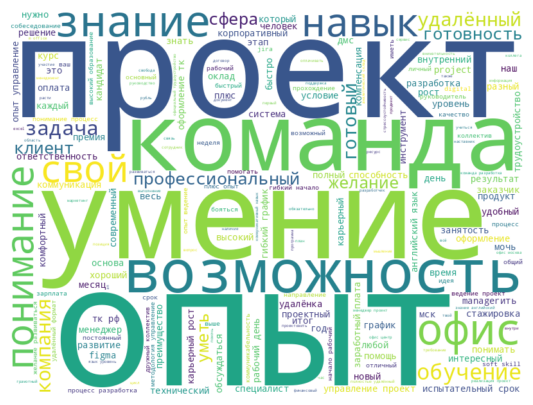

In [161]:
# Объединение текста из всех строк в одну переменную
all_text = ' '.join(drrr['language'].tolist())
all_text = all_text.lower()

# Токенизация, лемматизация и фильтрация стоп-слов для всего текста
all_tokens = tokenize_lemmatize_and_filter(all_text)

# Объединение токенов для создания облака слов
text_for_wordcloud = ' '.join(all_tokens)

WC(text_for_wordcloud)

In [162]:
text_high_popularity = ''.join(drrr.query('attractive == "high"')['language'])
# function_worldcloud(text_high_popularity)

In [163]:
text_low_popularity = ''.join(drrr.query('attractive == "low"')['language'])
# function_worldcloud(text_low_popularity)

In [164]:
all_text = ''.join(drrr['language'].tolist())

In [165]:
all_text

'Разговорный английский язык - уверенный B2 и выше,_x000D_\nОпыт работы менеджером проектов: можно почти без опыта или после курсов, мы всему научим_x000D_\nПонимание процессов работы с мобильными приложениями_x000D_\nПонимание работы продуктовой компании_x000D_\nУмение четко ставить цели и фокусироваться на результате работы_x000D_\nСпособность мотивировать команду_x000D_\nПриветствуется постоянное стремление к повышению уровня в менеджменте проектовТОЛЬКО ОФИСНАЯ ЗАНЯТОСТЬ В МОСКВЕ _x000D_\n_x000D_\nКорпоративный английский_x000D_\nСвоевременные выплаты заработной платы_x000D_\nГрафик 5/2 с 8:50 до 18:00 по МСКjunior project managerБудет плюсом:_x000D_\nОпыт работы с проектами в Xcode_x000D_\nОпыт заливки проектов в приложении Store Connect_x000D_\nУмение работать в Figma_x000D_\nПонимание, как вести проекты в Jira_x000D_\nРазработка ТЗ- Системность, структурность, четкость. Нужен четкий контроль команды и ведение всех документов / таблиц. (работаем в Google Doc, Notion, Asana, вирту

In [166]:
good_words=[]
commom_words=[]
bad_words=[]
for word in all_text:
    if (word in text_high_popularity and word in text_low_popularity):
        commom_words.append(word),
    if word in text_high_popularity and word not in text_low_popularity:
        good_words.append(word),
    if word not in text_high_popularity and word in text_low_popularity:
        bad_words.append(word)

In [167]:
mistik_good =''.join(good_words)

In [168]:
mistik_bad =''.join(bad_words)

In [169]:
display(mistik_good)

'\u200b\u200bVV?\u200bZ\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Z\xa0\xa0\xa0\xa0\xa0\xa0•\t•\t•\t•\t•\t•\t•\t•\t•\t•\t•\t•\t•\t?VV\xa0\xa0\xa0\xa0\xa0\xa0\xa0→→→→→→→→→→→→Z→→→\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200bZ?\u200b→→→?V••••••\t•\t•\t•\t•\t•\t••V'

In [170]:
display(mistik_bad)

'̆̆̆$\u200dz😇…Ш₽'

In [171]:
bad_words

['̆', '̆', '̆', '$', '\u200d', 'z', '😇', '…', 'Ш', '₽']

In [172]:
common=''.join(commom_words)

In [173]:
common

'Разговорный английский язык - уверенный B2 и выше,_x000D_\nОпыт работы менеджером проектов: можно почти без опыта или после курсов, мы всему научим_x000D_\nПонимание процессов работы с мобильными приложениями_x000D_\nПонимание работы продуктовой компании_x000D_\nУмение четко ставить цели и фокусироваться на результате работы_x000D_\nСпособность мотивировать команду_x000D_\nПриветствуется постоянное стремление к повышению уровня в менеджменте проектовТОЛКО ОФИСНАЯ ЗАНЯТОСТ В МОСКВЕ _x000D_\n_x000D_\nКорпоративный английский_x000D_\nСвоевременные выплаты заработной платы_x000D_\nГрафик 5/2 с 8:50 до 18:00 по МСКjunior project managerБудет плюсом:_x000D_\nОпыт работы с проектами в Xcode_x000D_\nОпыт заливки проектов в приложении Store Connect_x000D_\nУмение работать в Figma_x000D_\nПонимание, как вести проекты в Jira_x000D_\nРазработка ТЗ- Системность, структурность, четкость. Нужен четкий контроль команды и ведение всех документов / таблиц. (работаем в Google Doc, Notion, Asana, виртуал

**Выводы** уникальных слов, которые могут быть только в объявлениях с высокой или низкой конверсией, не обнаружено. Зато выявлены другие символы: эмодзи, знаки маркировки текста. В принципе, это даже можно интерпретировать.

**Словари** для привлекательных вакансий

In [174]:
# def get_words(text):
# #     with open(filename, encoding="utf8") as file:
# #         text = file.read()
#     text = text.replace("\n", " ")
#     text = text.replace(",", "").replace(".", "").replace("?", "").replace("!", "")
#     text = text.lower()
#     words = text.split()
#     #words = tokenize_lemmatize_and_filter(words)
#     #all_tokens = tokenize_lemmatize_and_filter(all_text)
#     words.sort()
#     return words

In [175]:
# words = get_words(text_high_popularity)

In [176]:
words = tokenize_lemmatize_and_filter(text_high_popularity)

In [177]:

words_dict = get_words_dict(words)
print(f"Кол-во слов: {len(words)}")
print(f"Кол-во уникальных слов: {len(words_dict)}")
print("Все использованные слова:")
for word in words_dict:
    print(word.ljust(20), words_dict[word])


Кол-во слов: 3203
Кол-во уникальных слов: 1181
Все использованные слова:
наличие              2
высокий              17
образование          7
уверенный            4
владение             6
m                    5
office               4
знание               27
figma                6
miro                 5
soft                 5
skill                8
проактивный          1
бояться              3
новый                8
умение               36
быстро               8
перестроиться        1
режим                7
многозадачность      5
аналитический        6
навык                19
критический          3
мышление             5
подготовка           2
офис                 33
москва               9
проспект             2
мир                  3
оформление           19
тк                   16
гражданин            1
рф                   14
искать               1
специалист           1
который              18
готовый              13
вникнуть             1
специфика            2
задача              

In [178]:
#good_vocab = pd.DataFrame.from_dict(words_dict, orient='index')
good_vocab = pd.DataFrame.from_dict(words_dict, orient='index', dtype=None)

# вывод DataFrame
print(good_vocab)

              0
наличие       2
высокий      17
образование   7
уверенный     4
владение      6
...          ..
ходить        1
посещение     1
объект        1
ярославль     1
managerить    1

[1181 rows x 1 columns]


In [179]:
good_vocab


0
наличие       2
высокий      17
образование   7
уверенный     4
владение      6
...          ..
ходить        1
посещение     1
объект        1
ярославль     1
managerить    1

[1181 rows x 1 columns]

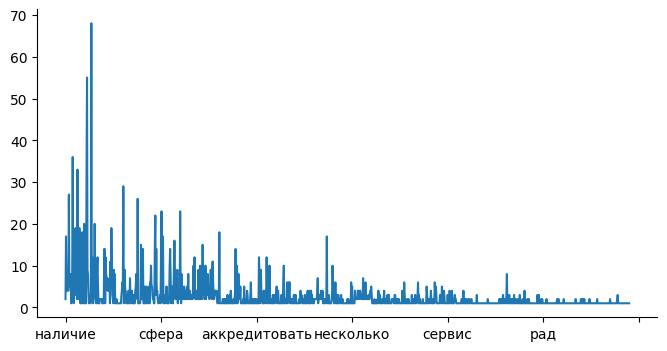

In [180]:


from matplotlib import pyplot as plt
good_vocab[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='0'>

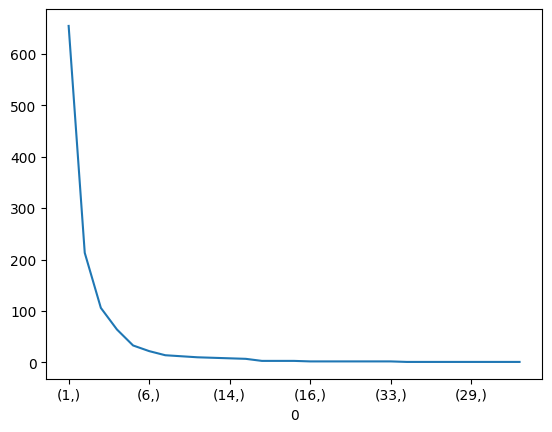

In [181]:
good_vocab.value_counts().plot()

**Зако́н Ци́пфа** - дальшейшую работу с по анализу текстов можно проводить, убрав из рассмотрения самые частые и самые редкие слова.

#### 1. Влияние текстового описания условий работы на отклики

Облака слов для вакансий с хорошей и плохой конверсией очень похожи. Попробуем аналогично предыдущему примеру снять слой из самых высокочастотных токенов и посмотреть что под ним.

In [182]:
print(dv['work_conditions'].head(10))

6     ТОЛЬКО ОФИСНАЯ ЗАНЯТОСТЬ В МОСКВЕ _x000D_\n_x0...
8     Друзья, на эту позицию вместо себя ищет кандид...
12    — Возможность развития в российском и междунар...
26    100% офис _x000D_\nМосква (Проспект Мира)_x000...
33    - 100% удаленка - быть на связи по московскому...
36    - 100% удаленка _x000D_\n- Испытательный срок ...
51    - 100% офис; _x000D_\n- г. Санкт-Петербург, ул...
78    - Оклад + премия по результатам работы (годово...
80    - г.Москва, ст.м. Дмитровская, ул. Складочная ...
88    В июле 2022 на партнёрскую вакансию в эту комп...
Name: work_conditions, dtype: object


In [183]:
# Обработка текста: удаление стоп-слов и лемматизация
dv['work_conditions'] = dv['work_conditions'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
dv['work_conditions'] = dv['work_conditions'].apply(lambda x: lemmatize_words(x, morph))


In [184]:
print(dv['work_conditions'].head(10))

6     офисный занятость москва _x000d_ _x000d_ корпо...
8     друг , позиция вместо искать кандидат выпускни...
12    — возможность развитие российский международны...
26    100 % офис _x000d_ москва ( проспект мир ) _x0...
33    - 100 % удалёнка - связь московский времени_x0...
36    - 100 % удалёнка _x000d_ - испытательный срок ...
51    - 100 % офис ; _x000d_ - г. санкт-петербург , ...
78    - оклад + премия результат работа ( годовой бо...
80    - г.москва , ст.м . дмитровский , ул . складоч...
88    июль 2022 партнёрский вакансия компания выйти ...
Name: work_conditions, dtype: object


In [185]:
dv['work_conditions'] = dv['work_conditions'].apply(dataset_clean)

In [186]:
print(dv['work_conditions'].head(10))

6     офисный занятость москва корпоративный английс...
8     друг , позиция вместо искать кандидат выпускни...
12    — возможность развитие российский международны...
26    100 % офис москва ( проспект мир ) фул-тайм оф...
33    - 100 % удалёнка - связь московский времени - ...
36    - 100 % удалёнка - испытательный срок 3 проект...
51    - 100 % офис ; - г. санкт-петербург , ул . мар...
78    - оклад + премия результат работа ( годовой бо...
80    - г.москва , ст.м . дмитровский , ул . складоч...
88    июль 2022 партнёрский вакансия компания выйти ...
Name: work_conditions, dtype: object


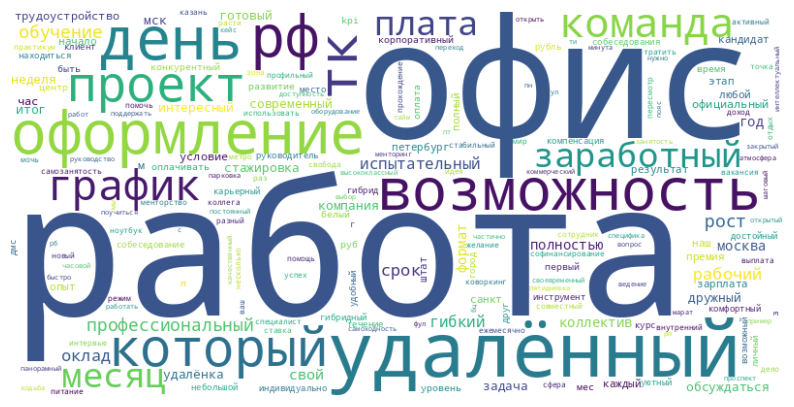

In [187]:
text_high_popularity = ' '.join(dv.query('attractive == "high"')['work_conditions'])
function_worldcloud(text_high_popularity)

In [188]:
text_high_popularity

"100 % офис москва ( проспект мир ) фул-тайм оформление тк ( только гражданин рф ) искать специалист , который готовый быстро вникнуть специфика задача . самоходность - готовый `` водить рука '' долго . команда проект , который нужно дружный готовый помочь , ответить вопрос делиться материал работа . - 100 % офис ; - г. санкт-петербург , ул . марат , 82 ( бц `` марат 82 '' ) 7-й минута ходьба станция метро “ звенигородский ” / “ пушкинский ” - заработный плата задержка 2 раз месяц ( обсуждаться каждый кандидат индивидуально ) ; - официальный трудоустройство тк рф ; - комфортный условие труд гибкий начало рабочий время ; - качественный оборудование бесперебойный работа ; - коллектив , который поддержать помочь ; компания организовывать friday party интеллектуальный конкурс встреча мастер-класс приятный приз радостный атмосфера . июль 2022 партнёрский вакансия компания выйти выпускница практикум - ux/ui дизайнер. условие работа : конкурентный з/п итог собеседования пн.-пт . 10 19 ( возмо

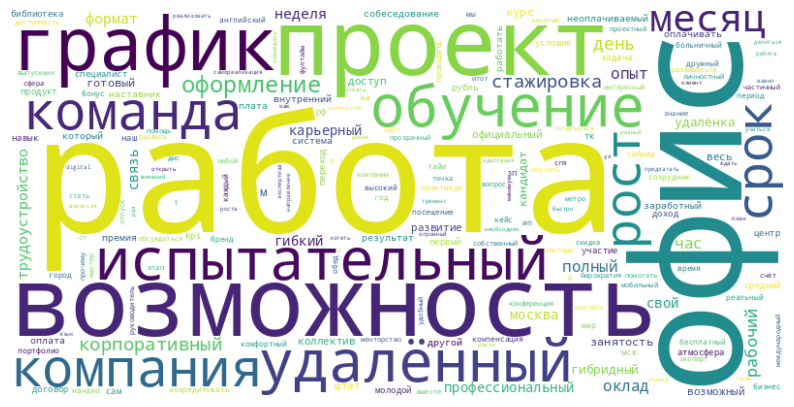

In [189]:
text_low_popularity = ' '.join(dv.query('attractive == "low"')['work_conditions'])
function_worldcloud(text_low_popularity)

Выводы: никаких очевидных различий в словаре описаний условий работы не наблюдается. Попробуем убрать несколько самых высокочастотных слов (тематические признаки), может быть отличия будут более наглядные.

In [190]:

def dataset_postclean1(x, nan_value= None):
    for column in x:
  # subs = subs[1:] # remove the first promotional subtitle
        txt = re.sub(HTML, ' ', x) # html tags change to spaces
        #txt = re.sub(COMMENTS, ' ', txt) # comments in parentheses change to spaces
        #txt = re.sub(LETTERS, ' ', txt) # anything that isn't a letter is a space
        txt = re.sub(DOTS, r'.', txt) # punctuation mark ellipsis change to dots
        txt = re.sub(SPACES, r'\1', txt) # repeated spaces change to one space
        #txt = re.sub(SYMB, '', txt) # punctuation marks other than apostrophe change to an empty string
        txt = re.sub('работа', '', txt) # 'www' change to an empty string
        txt = re.sub('удаленный', '', txt) # 'www' change to an empty string
        txt = re.sub('оформление', '', txt) # 'www' change to an empty string
        txt = re.sub('офис', '', txt) # 'www' change to an empty string
        txt = re.sub('день', '', txt) # 'www' change to an empty string
        txt = re.sub('_x000d_', '', txt) # 'www' change to an empty string
        txt = re.sub('удалённый', '', txt) # 'www' change to an empty string
        txt = re.sub('команда', '', txt) # 'www' change to an empty string
        txt = re.sub('возможность', '', txt) # 'www' change to an empty string
        txt = re.sub('компания', '', txt) # 'www' change to an empty string
        #txt = re.sub('оформление', '', txt) # 'www' change to an empty string
        #txt = txt.lstrip().rstrip().replace("\n","") # left space trimming
        #txt = txt.encode('ascii', 'ignore').decode() # remove all non-ascii characters
        #txt = txt.lower() # to lowercase
        txt = ' '.join(txt.split())
    return txt

In [191]:
dv['work_conditions'] = dv['work_conditions'].apply(dataset_postclean1)

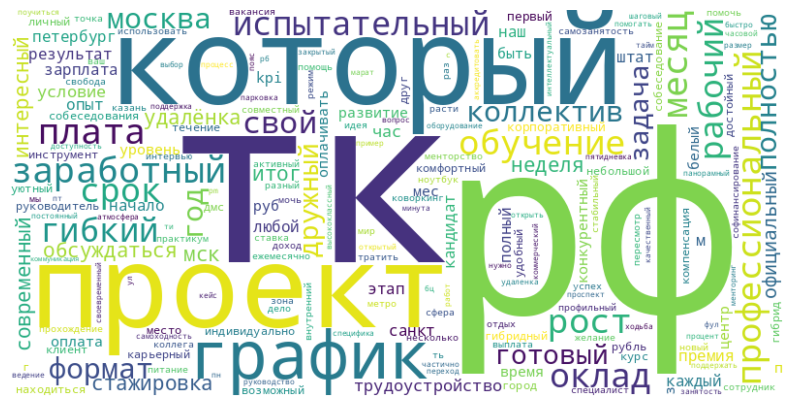

In [192]:
text_high_popularity = ' '.join(dv.query('attractive == "high"')['work_conditions'])
function_worldcloud(text_high_popularity)

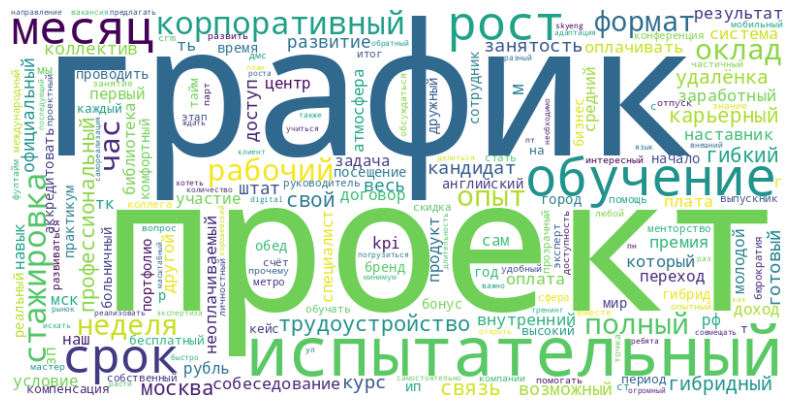

In [193]:
text_low_popularity = ' '.join(dv.query('attractive == "low"')['work_conditions'])
function_worldcloud(text_low_popularity)

Полезные находки: **"ТК РФ"**- в словаре описаний условий работы с хорошей конверсией, **проект, график** - для низкой конверсии

#### 2. Влияние текстового описания всех параметров вакансии на отклики

Попробуем объединить все текстовые данные объявления, и помотреть, есть будут ли в этом случае различия в зависимости от высокой/низкой конверсии

In [194]:
dv['language']

6       Разговорный английский язык - уверенный B2 и в...
8       - Системность, структурность, четкость. Нужен ...
12      — Заряд энергии и организаторские способности:...
26      Наличие высшего образования _x000D_\nУверенное...
33      Hard skills:_x000D_\n- Знание Trello_x000D_\n-...
                              ...                        
1215    — Внимательность и системность; _x000D_\n— Жел...
1232    Иметь представление об используемых на проекте...
1269    Образование высшее техническое/ИТ/финансы_x000...
1275    — Минимально разбираться в технической части (...
1290    Понимание процессов разработки и git flow; _x0...
Name: language, Length: 147, dtype: object

In [195]:
# Обработка текста: удаление стоп-слов и лемматизация
dv['language'] = dv['language'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
dv['language'] = dv['language'].apply(lambda x: lemmatize_words(x, morph))


In [196]:
dv['language'] = dv['language'].apply(dataset_clean)

In [197]:
dv['language']

6       разговорный английский язык - уверенный b2 выш...
8       - системность , структурность , чёткость . нуж...
12      — заряд энергия организаторский способность : ...
26      наличие высокий образование уверенный владение...
33      hard skills : - знание trello - уверенный влад...
                              ...                        
1215    — внимательность системность ; — желание разви...
1232    иметь представление использовать проект технол...
1269    образование высокий техническое/ит/финансы опы...
1275    — минимально разбираться технический часть ( ж...
1290    понимание процесс разработка git flow ; знание...
Name: language, Length: 147, dtype: object

In [198]:

def dataset_postclean2(x, nan_value= None):
    for column in x:
  # subs = subs[1:] # remove the first promotional subtitle
        txt = re.sub(HTML, ' ', x) # html tags change to spaces
        #txt = re.sub(COMMENTS, ' ', txt) # comments in parentheses change to spaces
        #txt = re.sub(LETTERS, ' ', txt) # anything that isn't a letter is a space
        txt = re.sub(DOTS, r'.', txt) # punctuation mark ellipsis change to dots
        txt = re.sub(SPACES, r'\1', txt) # repeated spaces change to one space
        #txt = re.sub(SYMB, '', txt) # punctuation marks other than apostrophe change to an empty string
        txt = re.sub('работа', '', txt) # 'www' change to an empty string
        txt = re.sub('знание', '', txt) # 'www' change to an empty string
        txt = re.sub('работать', '', txt) # 'www' change to an empty string
        txt = re.sub('умение', '', txt) # 'www' change to an empty string
        txt = re.sub('опыт', '', txt) # 'www' change to an empty string
        txt = re.sub('_x000d_', '', txt) # 'www' change to an empty string
        txt = re.sub('ть', '', txt) # 'www' change to an empty string
        txt = re.sub('команда', '', txt) # 'www' change to an empty string
        txt = re.sub('возможнос', '', txt) # 'www' change to an empty string
        txt = re.sub('проект', '', txt) # 'www' change to an empty string
        txt = re.sub('офис', '', txt) # 'www' change to an empty string
        txt = re.sub('понимание', '', txt) # 'www' change to an empty string
        txt = re.sub('оформление', '', txt) # 'www' change to an empty string
        txt = re.sub('удалённый', '', txt) # 'www' change to an empty string
        txt = re.sub('день', '', txt) # 'www' change to an empty string
        #txt = txt.lstrip().rstrip().replace("\n","") # left space trimming
        #txt = txt.encode('ascii', 'ignore').decode() # remove all non-ascii characters
        #txt = txt.lower() # to lowercase
        txt = ' '.join(txt.split())
    return txt

In [199]:
dv['language'] = dv['language'].apply(dataset_postclean2)

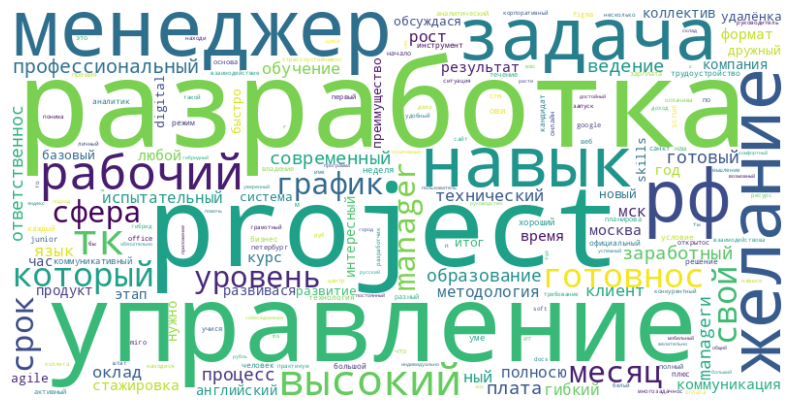

In [200]:
text_high_popularity = ' '.join(dv.query('attractive == "high"')['language'])
function_worldcloud(text_high_popularity)

In [201]:
text_high_popularity

"наличие высокий образование уверенный владение ms office figma , miro soft skills : - проактивный - бояся новый задач - быстро перестроися режим многозадачнос - высокий аналитический навык критический мышление , - навык подготовка презентаций100 % москва ( проспект мир ) фул-тайм тк ( только гражданин рф ) иска специалист , который готовый быстро вникну специфика задача . самоходнос - готовый `` води рука '' долго . , который нужно дружный готовый помочь , ответи вопрос делися материал работы.project managerжелательный бизнес-аналитик , интерес it-технология наличие технический высокий образование преимущество hard skills : - уверенный владение ms office google docs soft skills : - желание расти развивася - коммуникабельнос исполнительнос - перевести желание просьба клиент технический язык разработчик - структурирова информация , сформулирова тот задание- 100 % ; - г. санкт-петербург , ул . марат , 82 ( бц `` марат 82 '' ) 7-й минута ходьба станция метро “ звенигородский ” / “ пушкинс

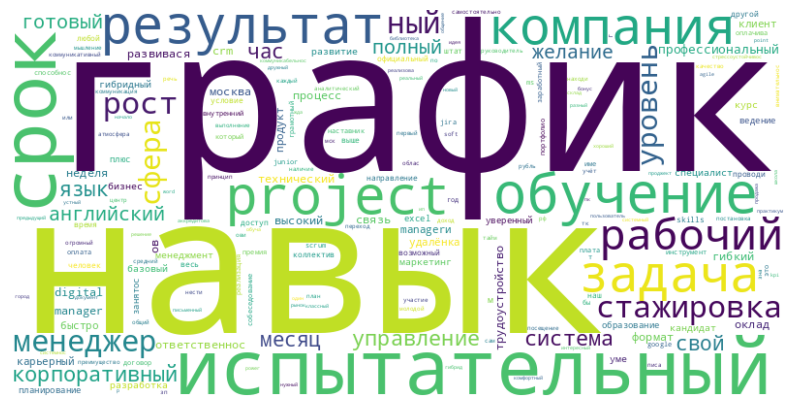

In [202]:
text_low_popularity = ' '.join(dv.query('attractive == "low"')['language'])
function_worldcloud(text_low_popularity)

In [203]:
text_low_popularity

"- системнос , структурнос , чёткос . нужный чёткий контроль ведение документ / таблица . ( google doc , notion , asana , виртуальный telegram ) - выстраивание пу клиент - автоворонки - креатив , сторителинг , прогрев – сильный сторона - пообеща – сдела , задержива , опаздыва предупрежда форс-мажор стави новый срокдруг , позиция вместо иска кандидат выпускник практикум . первый этап собеседование . отбор тестовый задание. вакансия откры кандидат - рф другой страна ( снг , турция , etc . ) необходимо связь рабочий время мск ( 10:00 - 19:00 примерно ) . график гибкий , определённый время необходимо связь выходи созвон встречи совмеща другой вряд получися , хоте реализова свой навык один - велкома ! ) 50 000р фикс + kpi испытательный срока договор ( как самозанятый ип ) компания прожект выпускник практикум ) project-manager- плюс запуск онлайн-школа ( от 1 год ) - также интересный предыдущий продюсер , маркетолог , баера сейлз сфера , требовася постановка чёткий тз проверка : ) — заряд эн

На этом слое уже наблюдаются некоторые отличия. **управление, разработка** - высокая конверсия, **график, навык** - низкая конверсия.

#### 3. Влияние текста заголовка на "кликабельность"

Попробуем применить метод к простым кратким текстам - заголовкам. Здесь выберем другую метрику - категории популярности, по различию в количестве просмотров ("views").

##### Показатели частоты просмотров

In [204]:
print('показатели "кликабельности" в этой группе вакансий')
print("очень низкий уровень: менее ",dv['views'].quantile(1/4).round())
print("низкий уровень: oт ",dv['views'].quantile(1/4).round(), "до", dv['views'].quantile(1/3).round())
print("ниже среднего: oт ",dv['views'].quantile(1/3).round(), "до", dv['views'].quantile(1/2).round())
print("средний уровень: oт ",dv['views'].quantile(1/2).round(), "до", dv['views'].mean().round())
print("выше среднего: oт ",dv['views'].mean().round(), "до", dv['views'].quantile(2/3).round())
print("высокий: oт ",dv['views'].quantile(2/3).round(), "до", dv['views'].quantile(3/4).round())
print("очень высокий: более ",dv['views'].quantile(3/4).round())

показатели "кликабельности" в этой группе вакансий
очень низкий уровень: менее  23.0
низкий уровень: oт  23.0 до 27.0
ниже среднего: oт  27.0 до 37.0
средний уровень: oт  37.0 до 42.0
выше среднего: oт  42.0 до 49.0
высокий: oт  49.0 до 54.0
очень высокий: более  54.0


In [205]:
 #Определение квантилей для разбиения на категории
low_quantile = dv['views'].quantile(1/3)
high_quantile = dv['views'].quantile(2/3)

display(low_quantile)
high_quantile

27.0

49.0

In [206]:
def categorize_popularity(views):
    # Определение категории популярности
    if views <= low_quantile:
        return "low"
    elif views <= high_quantile:
        return "middle"
    else:
        return "high"

# Применение функции к столбцу "Количество просмотров" и создание нового столбца с категориями популярности
dv['clicable'] = dv['views'].apply(categorize_popularity)

In [207]:
dv['job_title']

6                                  junior project manager
8                                         project-manager
12                                            pr-менеджер
26                                        project manager
33                                        project manager
                              ...                        
1215                             project manager (junior)
1232                                      project manager
1269    руководитель направления развитие транзакционн...
1275                                      project manager
1290                    стажировка для project менеджеров
Name: job_title, Length: 147, dtype: object

In [208]:
# Обработка текста: удаление стоп-слов и лемматизация
dv['job_title'] = dv['job_title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
dv['job_title'] = dv['job_title'].apply(lambda x: lemmatize_words(x, morph))


In [209]:
dv['job_title']

6                                  junior project manager
8                                         project-manager
12                                            pr-менеджер
26                                        project manager
33                                        project manager
                              ...                        
1215                           project manager ( junior )
1232                                      project manager
1269    руководитель направление развитие транзакционн...
1275                                      project manager
1290                          стажировка project менеджер
Name: job_title, Length: 147, dtype: object

In [210]:
dv['job_title']=dv['job_title'].apply(dataset_clean)

In [211]:
dv['job_title']

6                                  junior project manager
8                                         project-manager
12                                            pr-менеджер
26                                        project manager
33                                        project manager
                              ...                        
1215                           project manager ( junior )
1232                                      project manager
1269    руководитель направление развитие транзакционн...
1275                                      project manager
1290                          стажировка project менеджер
Name: job_title, Length: 147, dtype: object

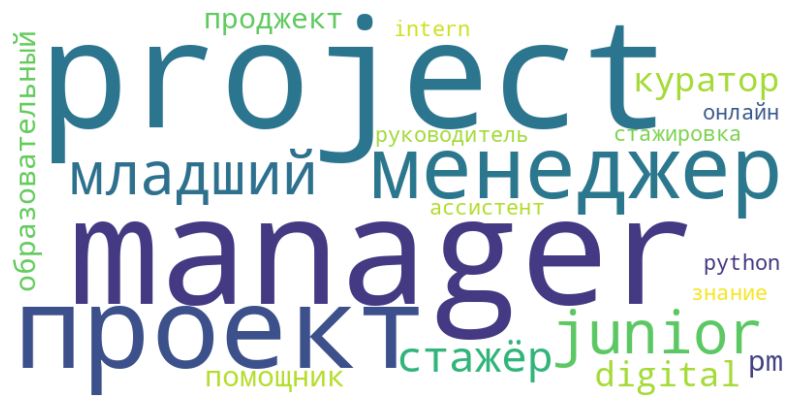

In [212]:
text_high_popularity = ' '.join(dv.query('clicable == "high"')['job_title'])
function_worldcloud(text_high_popularity)

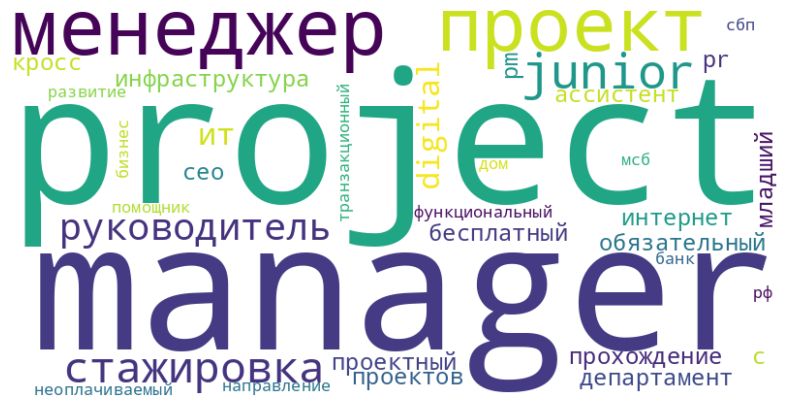

In [213]:
text_low_popularity = ' '.join(dv.query('clicable == "low"')['job_title'])
function_worldcloud(text_low_popularity)

**Результат**: особых различий нет

**Общий вывод** по влиянию текста на конверсию с точки зрения возможностей данного метода ("мешок слов"): отдельные моменты иллюстрирует хорошо, но в целом этот метод не учитывает связей между словами в словаре, поэтому для тематически близких описаний требует много коррекции.

##Самые успешные вакансии

Попробуем выявить и подробно изучить самые успешные вакансии: высокий уровень просмотров, высокий уровень отклика после просмотров.

In [427]:
top_views = dv[dv['clicable'] == 'high']

In [428]:
top_views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 8 to 1162
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               48 non-null     int64  
 1   status           48 non-null     object 
 2   lead_source      48 non-null     object 
 3   manager          47 non-null     object 
 4   start_date       48 non-null     object 
 5   end_date         45 non-null     object 
 6   views            48 non-null     int64  
 7   responses        48 non-null     int64  
 8   emp_brand        48 non-null     object 
 9   job_title        48 non-null     object 
 10  courses          48 non-null     object 
 11  salary_min       23 non-null     float64
 12  salary_max       21 non-null     float64
 13  city             48 non-null     object 
 14  contract         48 non-null     object 
 15  format           48 non-null     object 
 16  experience       48 non-null     object 
 17  education       

In [429]:
top_vac = top_views[top_views['attractive'] == 'high']

In [430]:
count_vac = top_views[top_views['attractive'] == 'low']

In [431]:
count_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 8 to 1049
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21 non-null     int64  
 1   status           21 non-null     object 
 2   lead_source      21 non-null     object 
 3   manager          20 non-null     object 
 4   start_date       21 non-null     object 
 5   end_date         19 non-null     object 
 6   views            21 non-null     int64  
 7   responses        21 non-null     int64  
 8   emp_brand        21 non-null     object 
 9   job_title        21 non-null     object 
 10  courses          21 non-null     object 
 11  salary_min       12 non-null     float64
 12  salary_max       10 non-null     float64
 13  city             21 non-null     object 
 14  contract         21 non-null     object 
 15  format           21 non-null     object 
 16  experience       21 non-null     object 
 17  education       

In [432]:
top_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 385 to 1162
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13 non-null     int64  
 1   status           13 non-null     object 
 2   lead_source      13 non-null     object 
 3   manager          13 non-null     object 
 4   start_date       13 non-null     object 
 5   end_date         13 non-null     object 
 6   views            13 non-null     int64  
 7   responses        13 non-null     int64  
 8   emp_brand        13 non-null     object 
 9   job_title        13 non-null     object 
 10  courses          13 non-null     object 
 11  salary_min       2 non-null      float64
 12  salary_max       2 non-null      float64
 13  city             13 non-null     object 
 14  contract         13 non-null     object 
 15  format           13 non-null     object 
 16  experience       13 non-null     object 
 17  education     

**Результат** самых успешных вакансий обнаружено 13 штук, посмотрим на них подробнее, для такого объема данных больше подойдет описательная статистика.

In [433]:
top_vac.sample(13)

id        status      lead_source       manager  start_date  \
403    805  Закрыта нами  Входящая заявка      Корягина  2023-04-28   
981   1643         Архив          Сорсинг     Фаткуллин  2023-09-08   
925   1567  Закрыта нами  Входящая заявка      Корягина  2023-09-06   
1121  1824  Закрыта нами      Реферальная     Фаткуллин  2023-10-18   
385    781  Закрыта нами  Входящая заявка      Корягина  2023-04-26   
1137  1846         Архив        Повторная  Селиверстова  2023-10-24   
580   1071         Архив          Сорсинг  Селиверстова  2023-06-21   
671   1197         Архив      Реферальная     Фаткуллин  2023-07-07   
656   1176         Архив        Повторная     Фаткуллин  2023-07-05   
954   1603         Архив          Сорсинг     Фаткуллин  2023-09-01   
1162  1878         Архив  Входящая заявка     Фаткуллин  2023-11-01   
875   1501         Архив        Повторная       Иванова  2023-08-21   
937   1581  Закрыта нами        Повторная      Корягина  2023-08-29   

        end_date  views  responses               emp_brand  \
403   2023-06-08     54         33             Satva Space   
981   2023-11-21     56         20                   Авито   
925   2023-09-25     62         28              Mobidriven   
1121  2023-12-15     62         38          Dinner is Near   
385   2023-06-08     51         19                   Saina   
1137  2023-12-14     53         25          No logo studio   
580   2023-09-06     61         27                    DZGN   
671   2023-08-11     91         44              Sport24.ru   
656   2023-08-07     75         27               Палиндром   
954   2023-09-15     52         29  Школа Валерии Климовой   
1162  2023-12-21     62         35     Т1 интеграция \ ВТБ   
875   2023-10-31     53         19            Think Mobile   
937   2023-09-20     59         22            Bot Creators   

                                              job_title  ...  \
403                              intern project manager  ...   
981                             младший менеджер проект  ...   
925                              junior project manager  ...   
1121                                    project manager  ...   
385                                     project manager  ...   
1137                                    менеджер проект  ...   
580                            помощник менеджер проект  ...   
671                                     project manager  ...   
656                              стажёр project manager  ...   
954   младший проджект-менеджер образовательный онла...  ...   
1162                                    project manager  ...   
875                             младший менеджер проект  ...   
937                              стажёр project manager  ...   

                 employment  \
403                  Полная   
981      Стажировка, Полная   
925                  Полная   
1121  Стажировка, Частичная   
385                  Полная   
1137                 Полная   
580                  Полная   
671                  Полная   
656              Стажировка   
954                  Полная   
1162                 Полная   
875                  Полная   
937                  Полная   

                                              mandatory  \
403   — Тебе интересна сфера IT и путь управления пр...   
981   обладаете опытом работы в технологических комп...   
925   Hard skills:_x000D_\n— Предыдущий опыт работы ...   
1121  • Энтузиазм и желание учиться_x000D_\n• Самост...   
385   — Опыт управления проектами в сфере разработки...   
1137  1. Знакомство с методологией управления проект...   
580   - базовые знания современных технологий в сфер...   
671   - Знание и понимание методологий управления пр...   
656   Готовность пройти стажировку и погрузиться в р...   
954   Личные качества:_x000D_\n_x000D_\nПроактивност...   
1162  Успешное прохождение курса в яндекс практикум....   
875   - отличное знание функционала MS Office_x000D_...   
937   — Желание развиваться в специальности P

In [434]:
columns_contains(top_vac, 'Junior_tag', 'job_title', 'junior', 29)

####Гипотезы 1 о влиянии признаков наименований (Junior, Junior+ итд.)

---



In [435]:
#junior_list = [ 'младш','jun','джун','начинающ','джун']

In [436]:
top_vac['junior_list'] = top_vac['language'].str.contains('|'.join(junior_list), na=False)
top_vac.insert(10, 'junior_list', top_vac.pop('junior_list'))


In [437]:
# good_title =['project manager junior', 'cтажер project manager', 'помощник руководителя проекта','руководитель проекта', 'менеджер проекта', 'координатор проекта',
            # 'менеджер it проектов', 'рroject manager middle']

IndentationError: unexpected indent (<ipython-input-437-742c0d385db5>, line 2)

In [438]:
top_vac['good_title'] = top_vac['language'].str.contains('|'.join(junior_list), na=False)
top_vac.insert(10, 'good_title', top_vac.pop('good_title'))


In [439]:
top_vac['good_title'].unique().tolist()

[False, True]

interval columns not set, guessing: ['conv', 'views', 'responses']


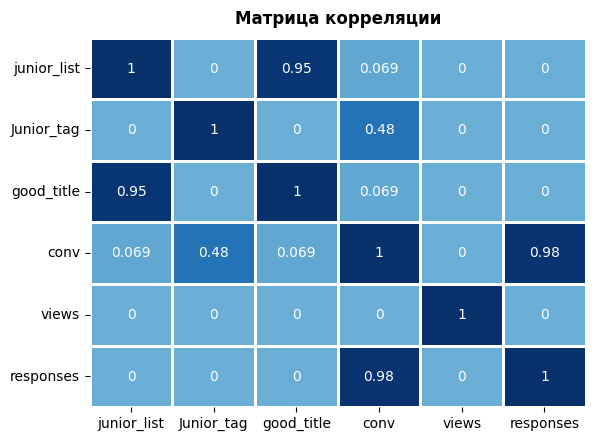

In [440]:
# Построим heatmap для изучение корреляции
sns.heatmap(top_vac[['junior_list', 'Junior_tag', 'good_title', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

Только слабая связь признака "junior" в заголовке и конверсии

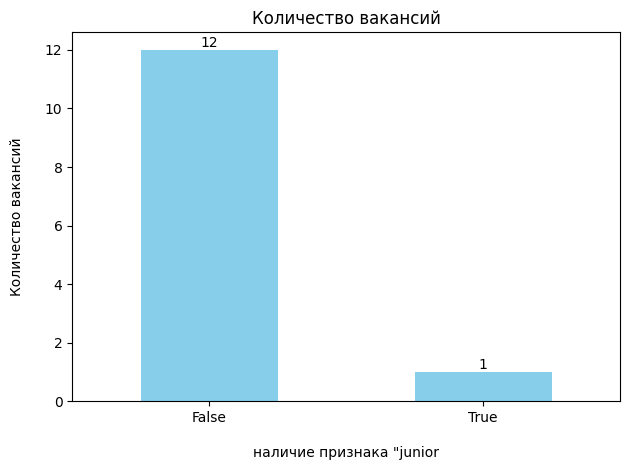

In [441]:
# Случаи когда есть и когда нет junior в названии

features_counts = top_vac['Junior_tag'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "junior', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

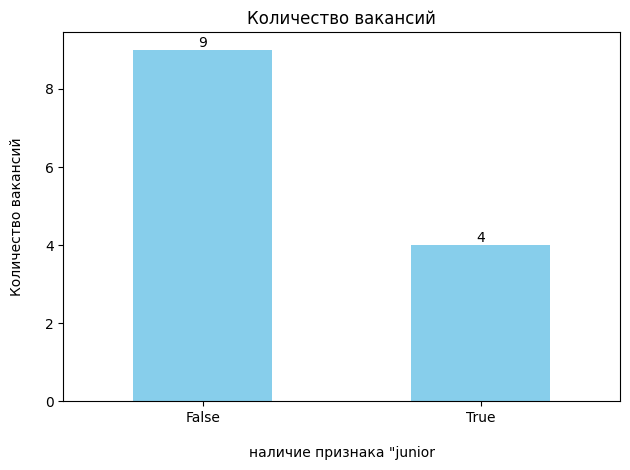

In [442]:
# Случаи когда есть и когда нет junior в названии

features_counts = top_vac['junior_list'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "junior', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

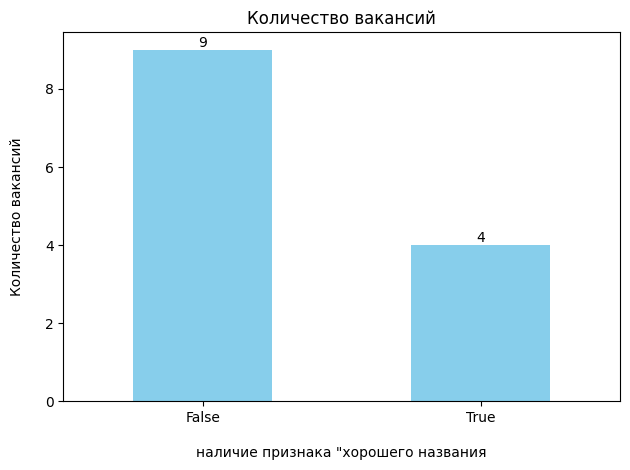

In [443]:
# Случаи когда есть и когда нет junior в названии

features_counts = top_vac['good_title'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "хорошего названия', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Выводы** Эта гипотеза не находит подтверждения

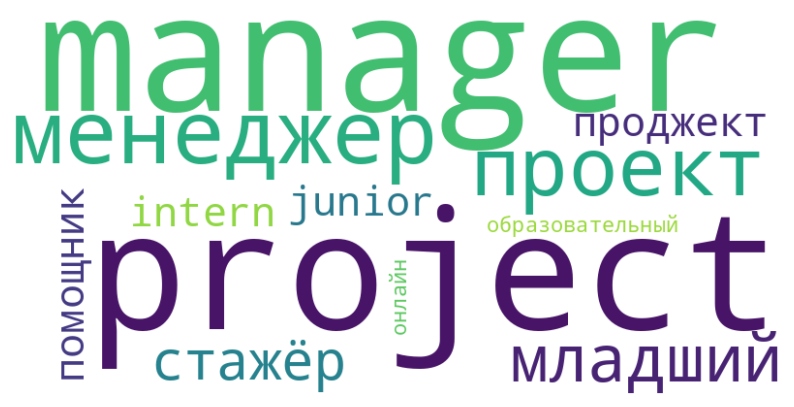

In [444]:
popularity = ' '.join(top_vac.query('clicable == "high"')['job_title'])
function_worldcloud(popularity)

Облако слов названий для лучших вакансий

#### Гипотеза 2 о признаке "стажировка"

In [445]:
# trainee_list = [ 'trainee','стажер','стажиров','практикант']

In [446]:
top_vac['trainee_tag'] = top_vac['job_title'].str.contains('|'.join(trainee_list), na=False)
top_vac.insert(12, 'trainee_tag', top_vac.pop('trainee_tag'))


In [447]:
top_vac['trainee_tag'].unique().tolist()

[False, True]

такого признака нет в названиях

In [448]:
top_vac['trainee_list'] = top_vac['language'].str.contains('|'.join(trainee_list), na=False)
top_vac.insert(13, 'trainee_list', top_vac.pop('trainee_list'))


In [449]:
top_vac['trainee_list'].unique().tolist()

[False, True]

но этот признак есть о общем тексте описания вакансии

interval columns not set, guessing: ['conv', 'views', 'responses']


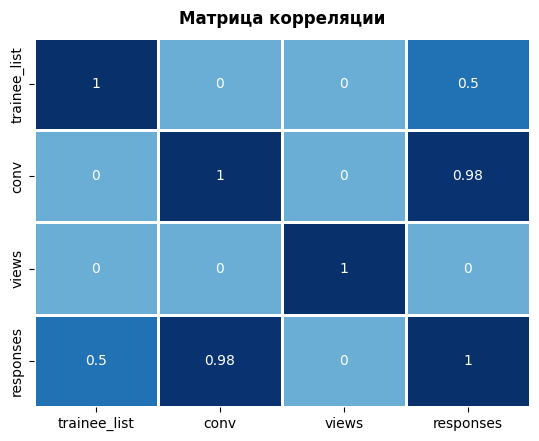

In [450]:
# Построим heatmap для изучение корреляции
sns.heatmap(top_vac[['trainee_list', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

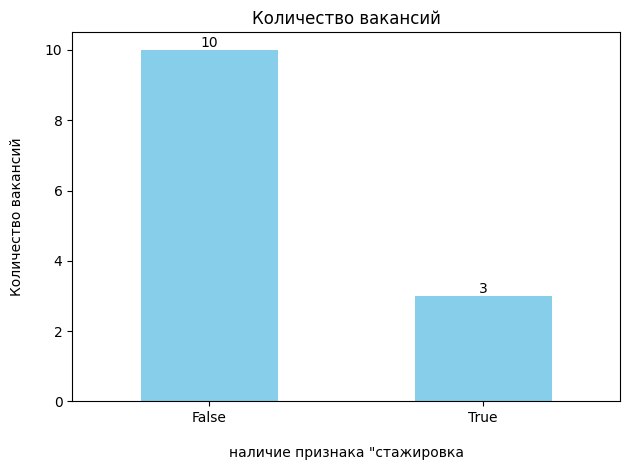

In [451]:
# Случаи когда есть и когда нет junior в названии

features_counts = top_vac['trainee_list'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "стажировка', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Вывод** признак стажировки встречается в избранных вакансиях, но реже его нет. Видна слабая связь этого признака с количеством откликов (в сторону увеличения откликов). Но нулевая связь с конверсией.

####Гипотезы 7 Город

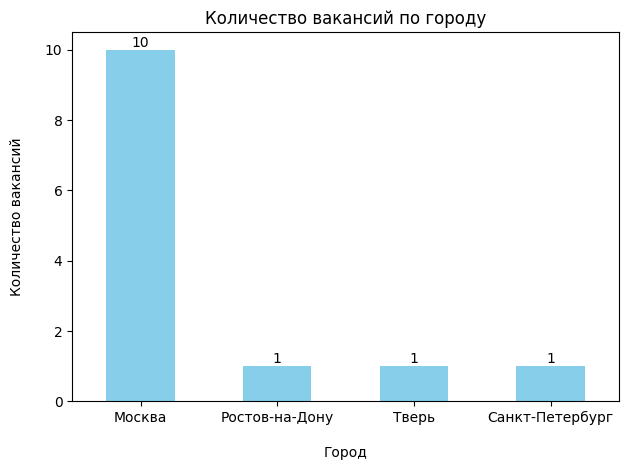

In [452]:
# Создадим график количества вакансий по городам из топа

features_counts = top_vac['city'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий по городу')
plt.xlabel('Город', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотезы 8 формат оформления

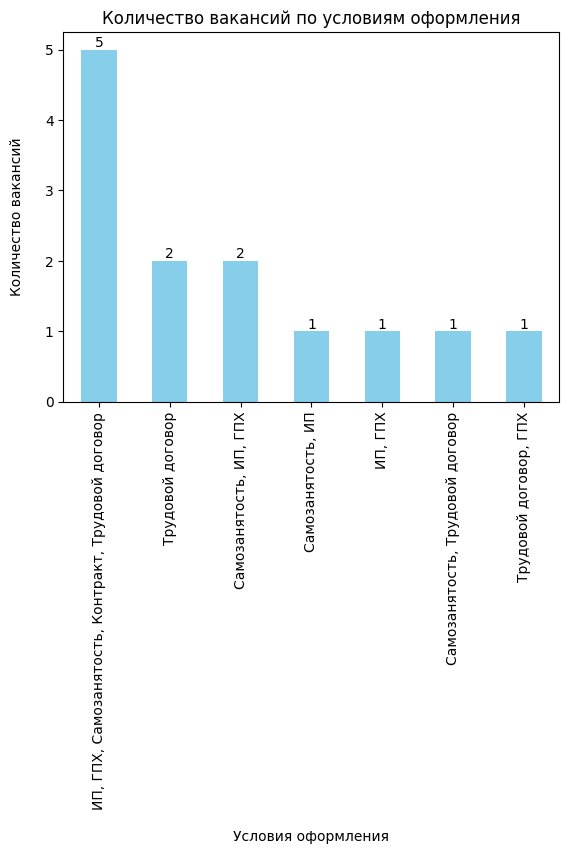

In [453]:
# Создадим график количества вакансий по условиям оформления из топа

features_counts = top_vac['contract'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий по условиям оформления')
plt.xlabel('Условия оформления', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [454]:
columns_contains(top_vac, 'Трудовой_договор', 'contract', 'Трудовой договор', 18)

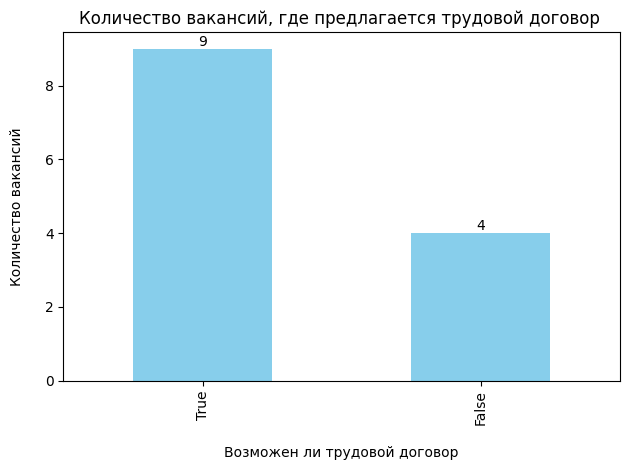

In [455]:
# Создадим график количества вакансий по условиям оформления из топа

features_counts = top_vac['Трудовой_договор'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий, где предлагается трудовой договор ')
plt.xlabel('Возможен ли трудовой договор', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотезе 6: формат работы (удаленка, офис..)

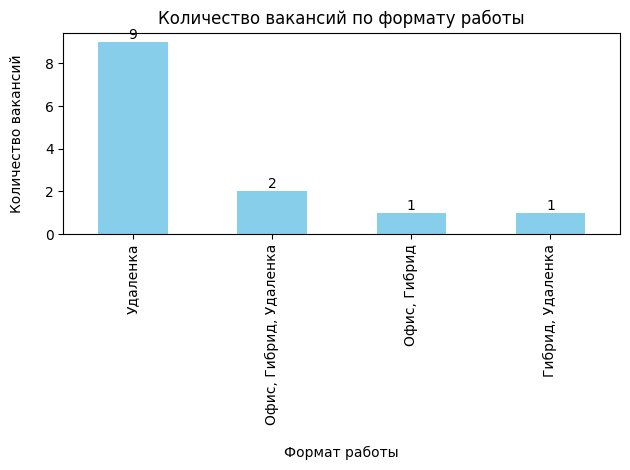

In [456]:
# Создадим график количества вакансий по формату работы

features_counts = top_vac['format'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий по формату работы')
plt.xlabel('Формат работы', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [457]:
columns_contains(top_vac, 'удаленка', 'format', 'Удаленка', 29)

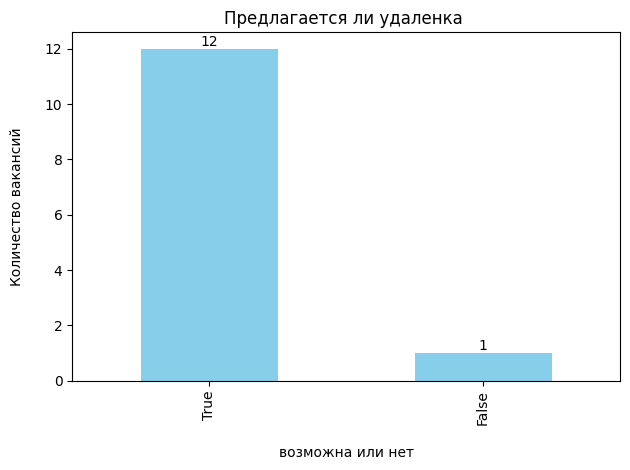

In [458]:
# Проверим отдельно признака "удаленка"

features_counts = top_vac['удаленка'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Предлагается ли удаленка ')
plt.xlabel('возможна или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

В этой группе большинство вакансий предлагают удаленку.

####Гипотезы 4: Технологии, ПО

In [459]:
top_vac['bad_list_new'] = top_vac['language'].str.contains('|'.join(bad_list_new), na=False)
top_vac.insert(10, 'bad_list_new', top_vac.pop('bad_list_new'))


In [460]:
top_vac['good_list_short'] = top_vac['language'].str.contains('|'.join(good_list_short), na=False)
top_vac.insert(11, 'good_list_short', top_vac.pop('good_list_short'))


interval columns not set, guessing: ['conv', 'views', 'responses']


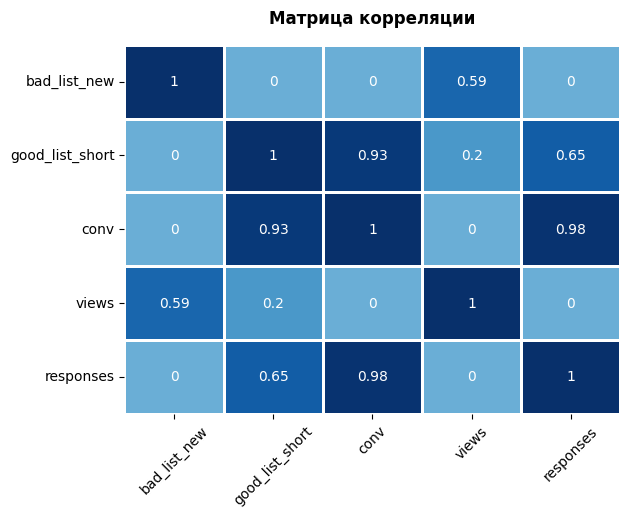

In [461]:
# Построим heatmap для изучение корреляции
sns.heatmap(top_vac[['bad_list_new', 'good_list_short', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [462]:
top_vac['bad_list_new']

385     False
403     False
580     False
656     False
671      True
875     False
925      True
937     False
954     False
981      True
1121    False
1137    False
1162    False
Name: bad_list_new, dtype: bool

In [463]:
print ('Присутствие в описании слов из не-хорошего списка:', top_vac['bad_list_new'].unique())
print(top_vac.groupby('bad_list_new')['bad_list_new'].count())



Присутствие в описании слов из не-хорошего списка: [False  True]
bad_list_new
False    10
True      3
Name: bad_list_new, dtype: int64


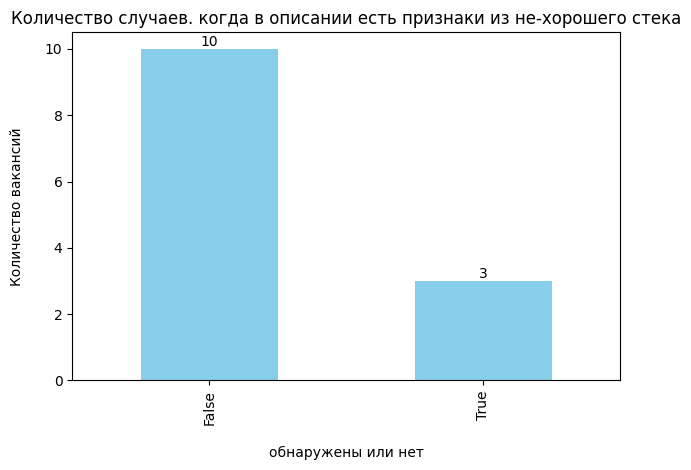

In [464]:
# Признаки слов из не-хорошего списка

features_counts = top_vac['bad_list_new'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев. когда в описании есть признаки из не-хорошего стека')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

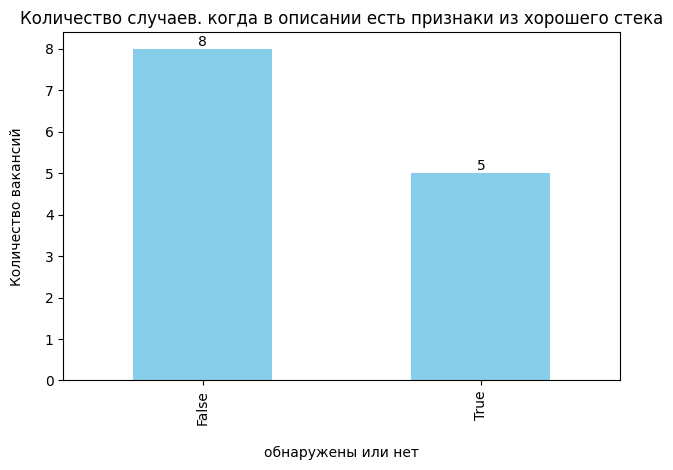

In [465]:
# Признаки слов из хорошего списка

features_counts = top_vac['good_list_short'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев. когда в описании есть признаки из хорошего стека')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Гипотеза 9: Зарплата

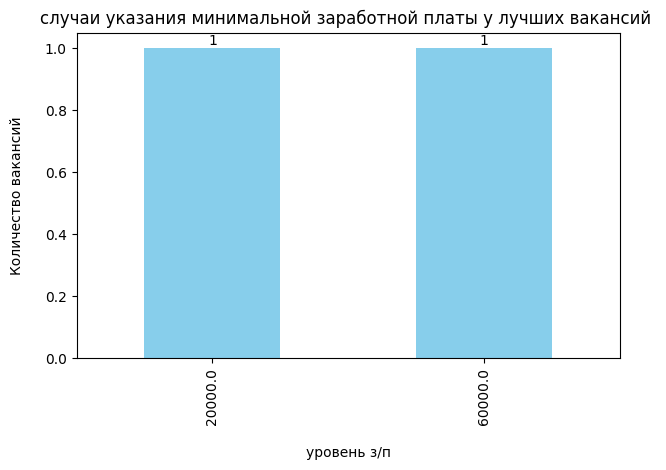

In [466]:
features_counts = top_vac['salary_min'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('случаи указания минимальной заработной платы у лучших вакансий ')
plt.xlabel('уровень з/п', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

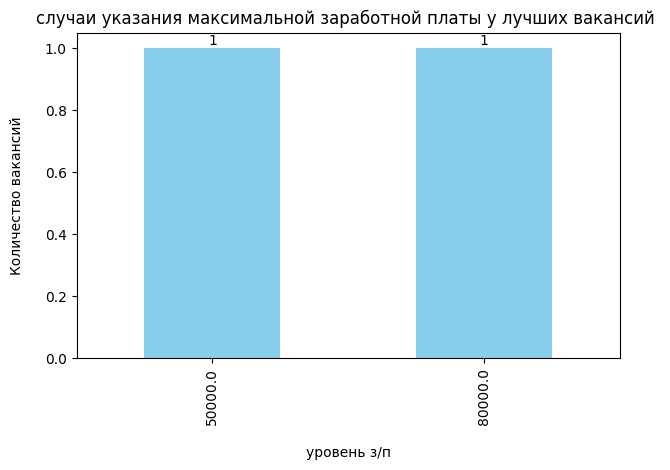

In [467]:
features_counts = top_vac['salary_max'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('случаи указания максимальной заработной платы у лучших вакансий ')
plt.xlabel('уровень з/п', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотеза 10: образование

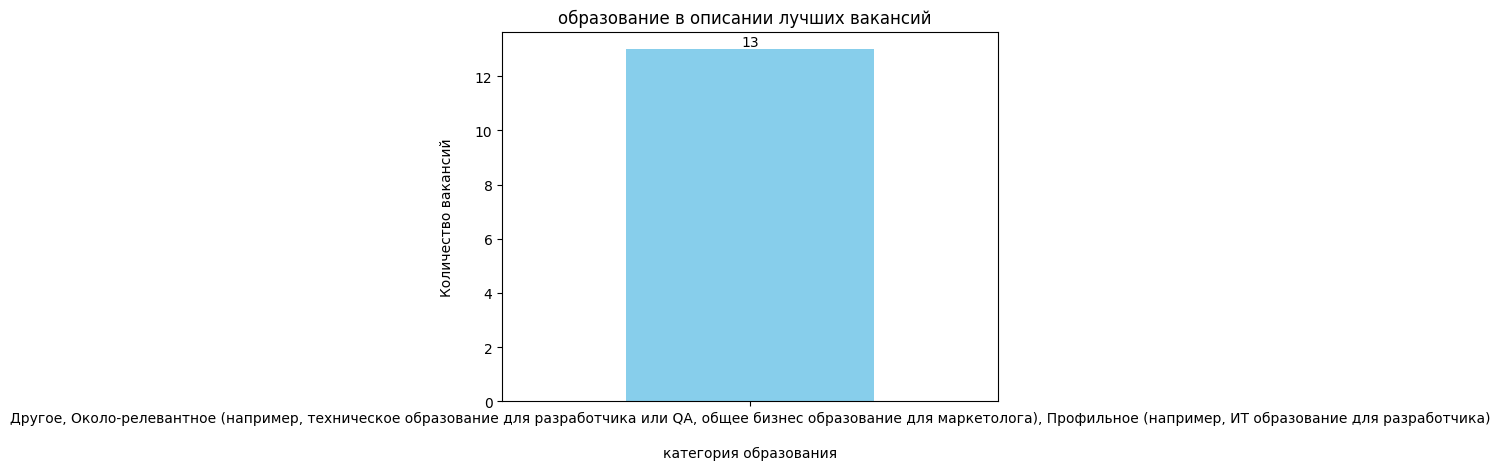

In [468]:
features_counts = top_vac['education'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('образование в описании лучших вакансий  ')
plt.xlabel('категория образования', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [469]:
top_vac['education'].unique()




array(['Другое, Около-релевантное (например, техническое образование для разработчика или QA, общее бизнес образование для маркетолога), Профильное (например, ИТ образование для разработчика)'],
      dtype=object)

####Гипотезы 3: Методология управления проектами

In [470]:
top_vac['agile_list'] = top_vac['language'].str.contains('|'.join(agile_list), na=False)
top_vac.insert(20, 'agile_list', top_vac.pop('agile_list'))


In [471]:
top_vac.groupby('agile_list')['agile_list'].count()

agile_list
False    8
True     5
Name: agile_list, dtype: int64

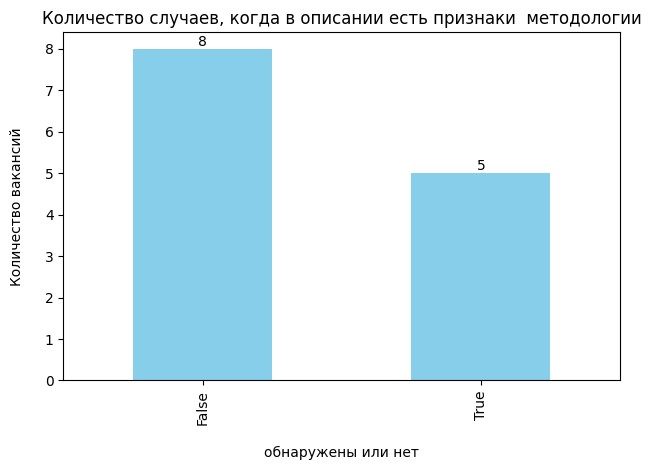

In [472]:
# Признаки

features_counts = top_vac['agile_list'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев, когда в описании есть признаки  методологии')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотезы 4, технологии и ПО

In [473]:
top_vac['good_list_short'] = top_vac['language'].str.contains('|'.join(good_list_short), na=False)
top_vac.insert(18, 'good_list_short', top_vac.pop('good_list_short'))


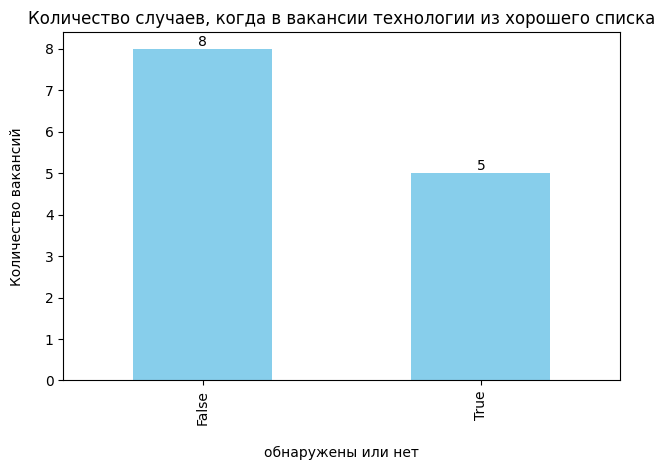

In [474]:
# Признаки

features_counts = top_vac['good_list_short'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев, когда в вакансии технологии из хорошего списка')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотезы 5: английский язык

In [475]:
top_vac['english_any'] = top_vac['language'].str.contains('|'.join(english_any), na=False)
top_vac.insert(21, 'english_any', top_vac.pop('english_any'))


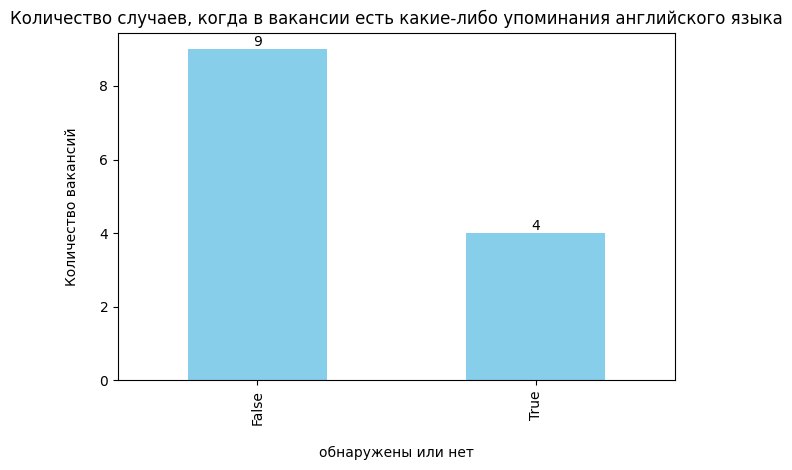

In [476]:
# Признаки

features_counts = top_vac['english_any'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев, когда в вакансии есть какие-либо упоминания английского языка')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Гипотезы 11: формы занятости

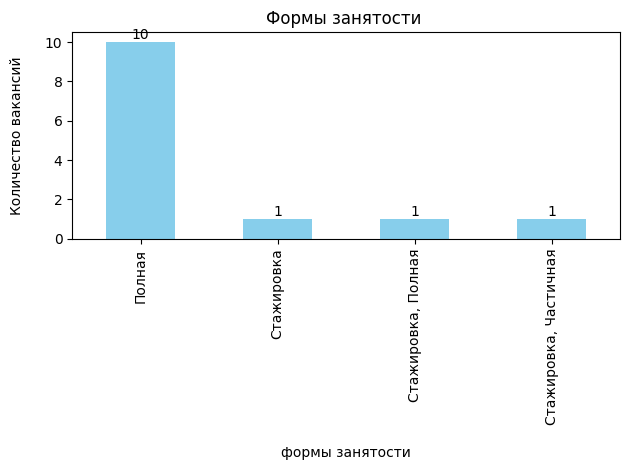

In [477]:
# Признаки

features_counts = top_vac['employment'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Формы занятости ')
plt.xlabel('формы занятости', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотеза 15: опыт категории

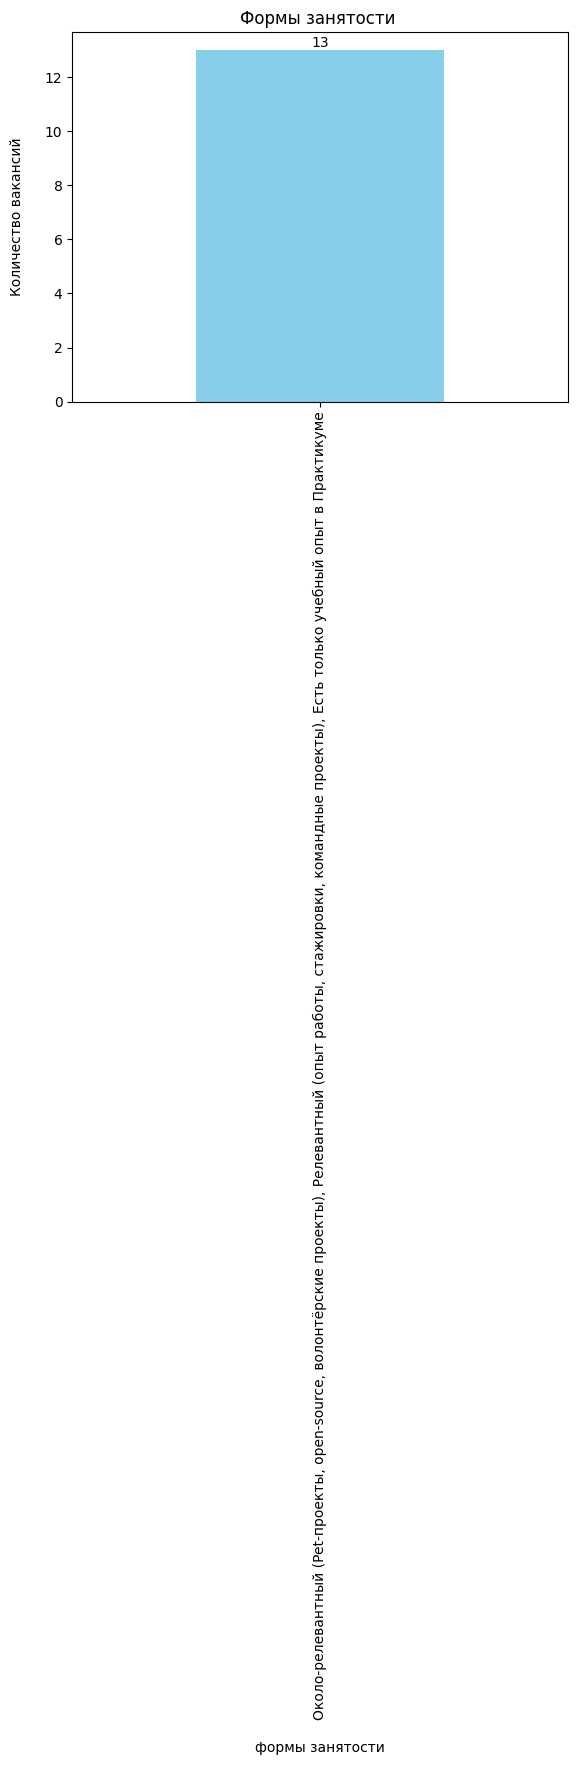

In [478]:
# Признаки

features_counts = top_vac['experience'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Формы занятости ')
plt.xlabel('формы занятости', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Условия работы у лучших вакансий (облако слов)

In [479]:
top_vac['work_conditions'] = top_vac['work_conditions'].apply(dataset_clean)

In [480]:
top_vac['work_conditions'] = top_vac['work_conditions'].apply(dataset_postclean1)

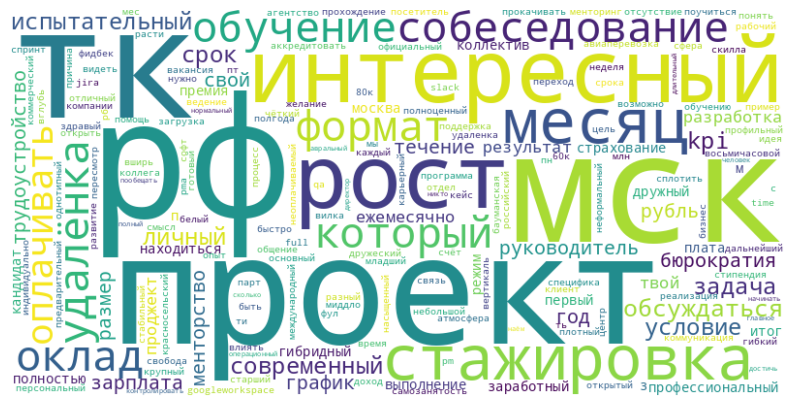

In [481]:
work_conditions = ' '.join(top_vac.query('clicable == "high"')['work_conditions'])
function_worldcloud(work_conditions)

####Все тексты описания лучших вакансий (облако слов)

In [482]:
top_vac['language'] = top_vac['language'].apply(dataset_clean)

In [483]:
top_vac['language'] = top_vac['language'].apply(dataset_postclean1)

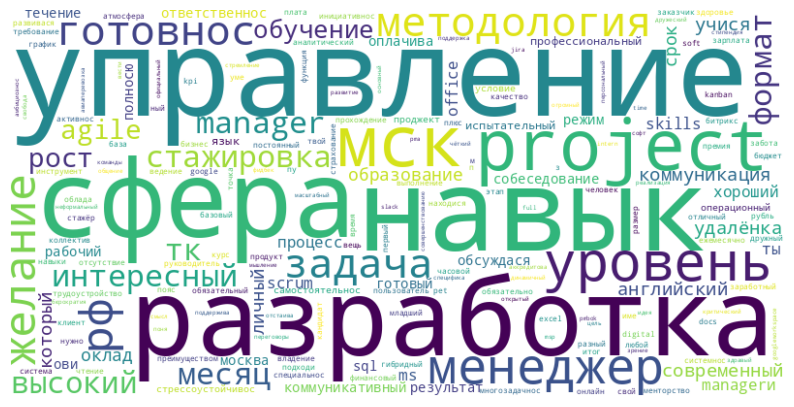

In [484]:
descr = ' '.join(top_vac.query('clicable == "high"')['language'])
function_worldcloud(descr)

#Примечания
Идеи. которые не успела проверить

*   Как влияет длина списков (ассортимент) в категории "contract", 'format"
*   Придумать как отличить отфильтровать стажировку с оплатой и без оплаты

*   Новый пункт

*   Новый пункт

*   Новый пункт
*   Новый пункт


*   Новый пункт


*   Новый пункт



